In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from math import sqrt 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os 
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.cm import get_cmap


In [3]:


file_paths = glob("C:/Users/yoyo/Nanyang Technological University/FYP_wang xiaoni/Site 02 - 00 - NTU - N3.2-B02-01m - Origin Node/*.csv")

merged_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_csv(file_path, header = None)
    merged_data = pd.concat([merged_data, data], ignore_index=True)

merged_data.to_csv("merged_data.csv", index=False)


In [4]:
df = merged_data

In [5]:
temp_time = df[[5, 7, 9, 13, 15, 17]]
column_mapping = {
    5: 'year',
    7: 'month',
    9: 'day',
    13: 'hour',
    15: 'minute',
    17: 'second',
}

temp_time.rename(columns=column_mapping, inplace=True)


In [6]:
datetime_series = pd.to_datetime(temp_time)
df['datetime'] = datetime_series

In [7]:
columns_to_drop = [4, 5, 6, 7, 8,9,12,13,14,15,16,17]  

df.drop(columns=columns_to_drop, inplace=True)

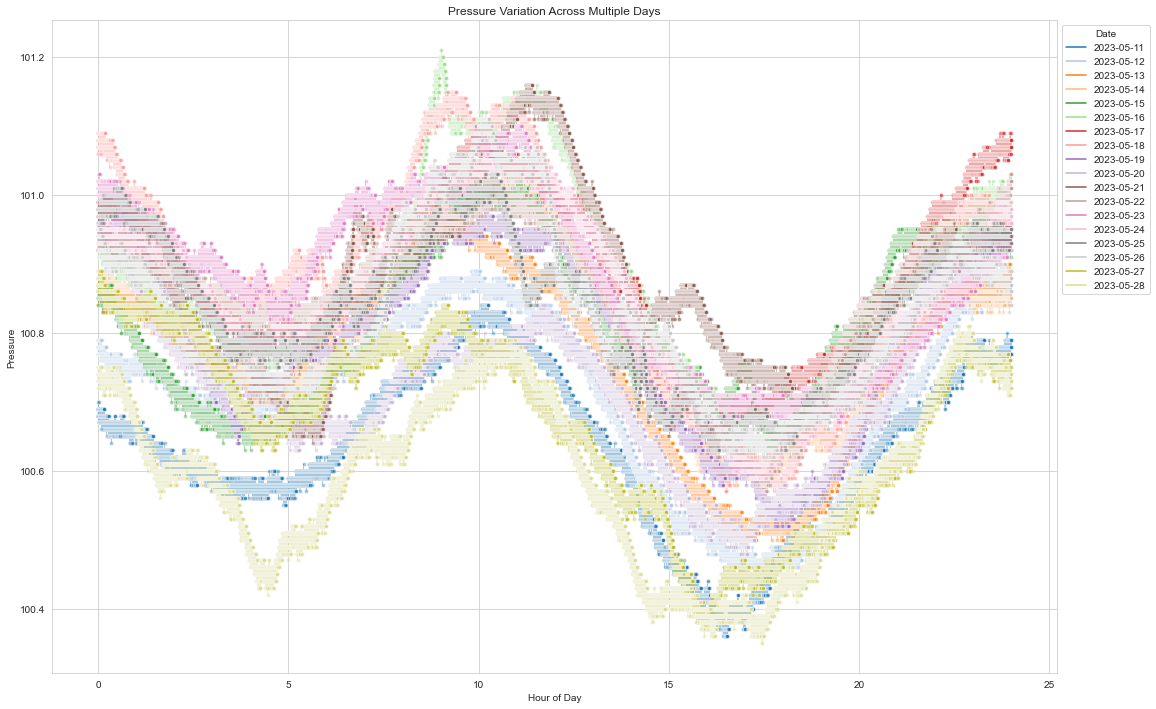

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df['date'] = df['datetime'].dt.date

sns.set_style("whitegrid")

plt.figure(figsize=(18, 12))

sns.lineplot(data=df, x=df['datetime'].dt.hour + df['datetime'].dt.minute / 60 + df['datetime'].dt.second / 3600,
             y=df[19], hue='date', palette='tab20', alpha=0.4, marker='o', markersize=4, linewidth=0.7)

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Variation Across Multiple Days')
plt.grid(True)
plt.legend(title='Date', bbox_to_anchor=(1, 1))
# plt.ylim(90, 110) 
plt.show()


In [9]:

column_mapping = {
    1: 'tick',
    3: 'unix_time',
    11: 'Day_of_Week',
    19: 'Pressure',
    22: 'BARO_Temperature',
    25: 'Temperature',
    28: 'Humidity',
    31: 'APDS9960_proximity',
    33: 'APDS9960_red',
    35: 'APDS9960_green',
    37: 'APDS9960_blue',
    39: 'accel_x',
    42: 'accel_y',
    45: 'accel_z',
    48: 'gyro_x',
    51: 'gyro_y',
    54: 'gyro_z',
    57: 'magnetometer_x',
    60: 'magnetometer_y',
    63: 'magnetometer_z',
}

df.rename(columns=column_mapping, inplace=True)
columns_to_drop = [0,2,10,18,20,21,23,24,26,27,29,30,32,34,36,38,40,41,43,44,46,47,49,50,52,53,55,56,58,59,61,62,64,65]  

df.drop(columns=columns_to_drop, inplace=True)

In [10]:
sundays_data = df[df['datetime'].dt.day_name() == 'Sunday']
sundays_data = pd.concat([sundays_data, df[df['datetime'].dt.day == 20]])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5) & (df['datetime'].dt.day != 20)]


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def accuracy(x,y):

    y_pred = model.predict(x)  


    mse = mean_squared_error(y, y_pred)

    mae = mean_absolute_error(y, y_pred)

    r2 = r2_score(y, y_pred)

    rmse = np.sqrt(mse)

    print('Model:')
    print('MSE:', mse)
    print('MAE:', mae)
    print('R^2:', r2)
    print('RMSE:', rmse)

# Ridge 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

Accuracy (MSE) for Sundays data: 0.02239223636804774


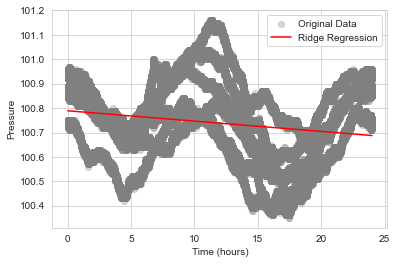

Accuracy (MSE) for Monday to Saturday data: 0.020601221297816896


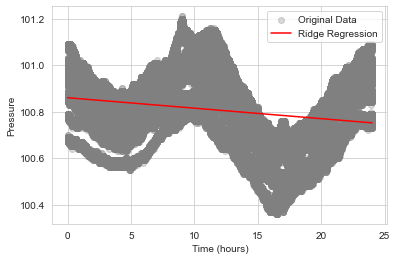

In [14]:


# Assuming you have 'sundays_data' and 'mon_to_sat_data' DataFrames

# Ridge regression for Sundays data
x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['Pressure'])

# Degree doesn't apply here as we're not using PolynomialFeatures
model_sundays = Ridge(alpha=1.0)

model_sundays.fit(x_sundays, y_sundays)

# Calculate accuracy (MSE in this case)
accuracy_sundays = mean_squared_error(y_sundays, model_sundays.predict(x_sundays))
print(f"Accuracy (MSE) for Sundays data: {accuracy_sundays}")

x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays = model_sundays.predict(x_values_sundays)

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data')
plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.show()

# Ridge regression for Monday to Saturday data
x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['Pressure'])

model_mon_to_sat = Ridge(alpha=1.0)

model_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

# Calculate accuracy (MSE in this case)
accuracy_mon_to_sat = mean_squared_error(y_mon_to_sat, model_mon_to_sat.predict(x_mon_to_sat))
print(f"Accuracy (MSE) for Monday to Saturday data: {accuracy_mon_to_sat}")

x_values_mon_to_sat = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat = model_mon_to_sat.predict(x_values_mon_to_sat)

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data')
plt.plot(x_values_mon_to_sat, y_values_mon_to_sat, color='red', label=f'Ridge Regression')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.show()


Model:
MSE: 0.14820140804710358
MAE: 0.3085603893518867
R^2: 0.3903670714250387
RMSE: 0.3849693598808918


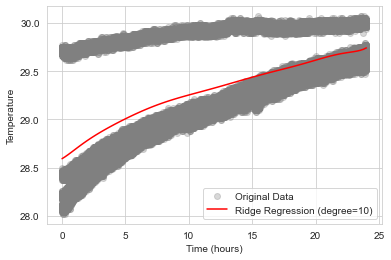

Model:
MSE: 0.4774878557270831
MAE: 0.43086187967405887
R^2: 0.8302198335610634
RMSE: 0.6910049607109077


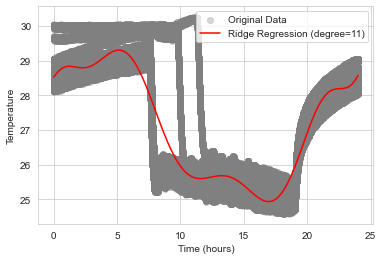

In [26]:
x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['Temperature'])

degree = 10  

model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='red', label=f'Ridge Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('Temperature')
plt.legend()
plt.show()
x = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(mon_to_sat_data['Temperature'])

degree = 11  

model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='red', label=f'Ridge Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('Temperature')
plt.legend()
plt.show()

Model:
MSE: 0.14353389665189062
MAE: 0.3032635107510401
R^2: 0.39810869005916505
RMSE: 0.37885867635820436


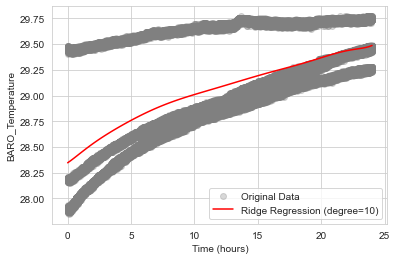

Model:
MSE: 0.4655869533820877
MAE: 0.420117444124464
R^2: 0.8338613446453397
RMSE: 0.6823393242237236


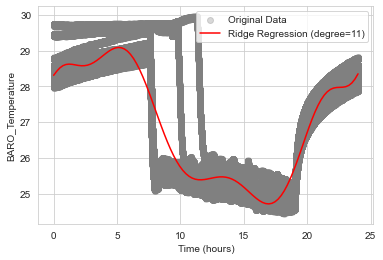

In [27]:
x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['BARO_Temperature'])

degree = 10  

model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='red', label=f'Ridge Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('BARO_Temperature')
plt.legend()
plt.show()
x = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(mon_to_sat_data['BARO_Temperature'])

degree = 11  

model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='red', label=f'Ridge Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('BARO_Temperature')
plt.legend()
plt.show()

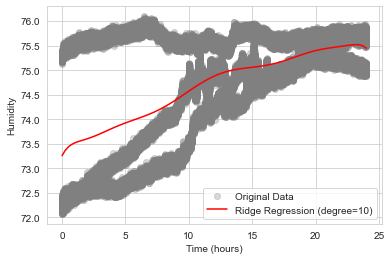

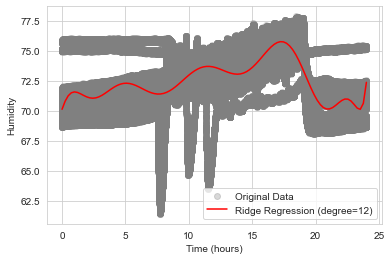

In [20]:
x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['Humidity'])

degree = 10  

model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='red', label=f'Ridge Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('Humidity')
plt.legend()
plt.show()
x = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(mon_to_sat_data['Humidity'])

degree = 12  

model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='red', label=f'Ridge Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('Humidity')
plt.legend()
plt.show()

# Lasso


In [14]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Model:
MSE: 0.022886327683919284
MAE: 0.12430085546788636
R^2: 0.215480314265051
RMSE: 0.151282278155504


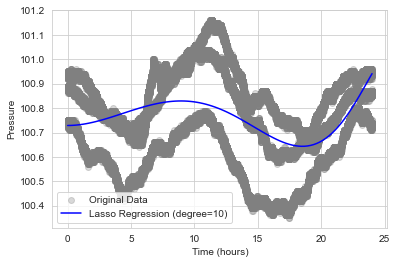

Model:
MSE: 0.012846189262319096
MAE: 0.09127734569144955
R^2: 0.40064411739434447
RMSE: 0.11334103079784962


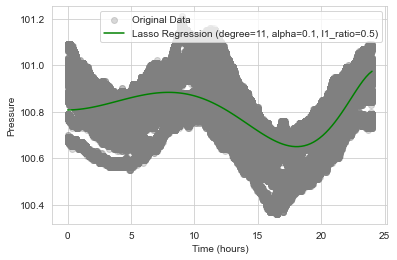

In [37]:
# Lasso
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['Pressure'])

degree = 10 

model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))  
model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='blue', label=f'Lasso Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.show()


x = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(mon_to_sat_data['Pressure'])

degree = 11  

alpha = 0.1  
 
model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))  

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Lasso Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.show()


Model:
MSE: 0.1930396531795152
MAE: 0.3866412640001573
R^2: 0.29758561835101394
RMSE: 0.43936278083096114


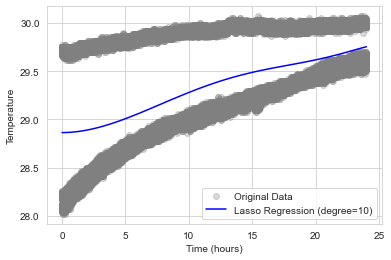

Model:
MSE: 1.027708482136465
MAE: 0.7030087928004026
R^2: 0.6436185569159981
RMSE: 1.0137595780738473


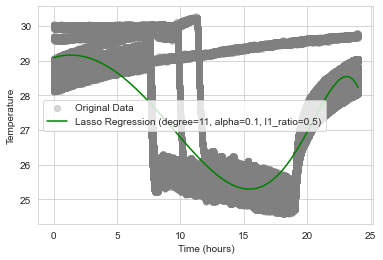

In [38]:
# Lasso
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['Temperature'])

degree = 10 

model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))  
model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='blue', label=f'Lasso Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('Temperature')
plt.legend()
plt.show()


x = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(mon_to_sat_data['Temperature'])

degree = 11  

alpha = 0.1  
 
model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))  

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Lasso Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('Temperature')
plt.legend()
plt.show()


Model:
MSE: 0.18728023826043452
MAE: 0.3801780822420953
R^2: 0.3061562573422226
RMSE: 0.43275886849426265


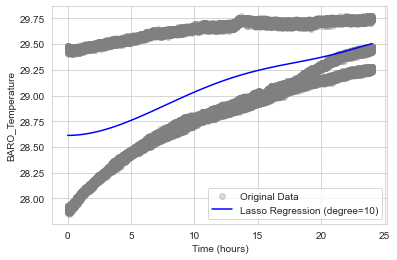

Model:
MSE: 1.0094298972976292
MAE: 0.6957184472604764
R^2: 0.6479799641184589
RMSE: 1.0047038853799806


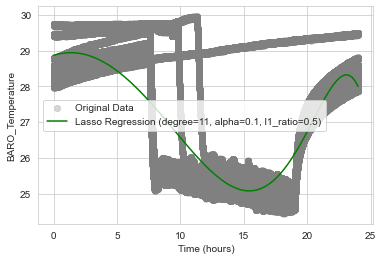

In [39]:
# Lasso
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['BARO_Temperature'])

degree = 10 

model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))  
model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='blue', label=f'Lasso Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('BARO_Temperature')
plt.legend()
plt.show()


x = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(mon_to_sat_data['BARO_Temperature'])

degree = 11  

alpha = 0.1  
 
model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))  

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Lasso Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('BARO_Temperature')
plt.legend()
plt.show()


Model:
MSE: 0.812078469557388
MAE: 0.7099587304468826
R^2: 0.3603982208221679
RMSE: 0.9011539655116588


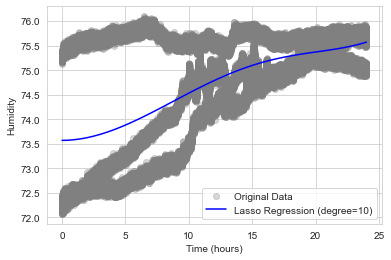

Model:
MSE: 3.9403432167438366
MAE: 1.5006187385933696
R^2: 0.3027521457498069
RMSE: 1.9850297772939922


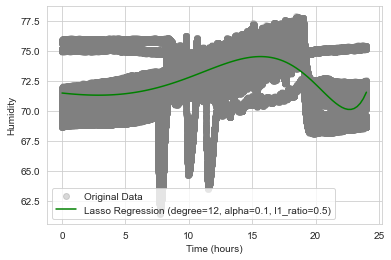

In [41]:
# Lasso
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['Humidity'])

degree = 10 

model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))  
model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='blue', label=f'Lasso Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('Humidity')
plt.legend()
plt.show()


x = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(mon_to_sat_data['Humidity'])

degree = 12  

alpha = 0.1  
 
model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))  

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Lasso Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('Humidity')
plt.legend()
plt.show()


# ELastic Net 

In [15]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


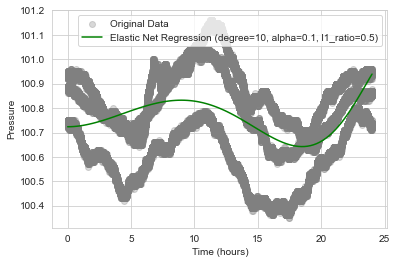

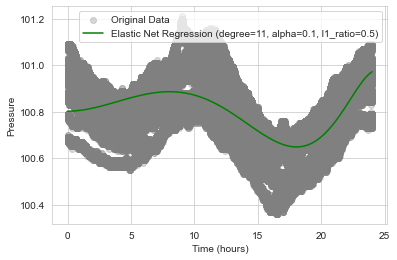

In [42]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['Pressure'])

degree = 10  

alpha = 0.1  
l1_ratio = 0.5  
model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))

model.fit(x, y)

x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Elastic Net Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.show()


x = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(mon_to_sat_data['Pressure'])

degree = 11  

alpha = 0.1  
l1_ratio = 0.5 
model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Elastic Net Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.show()


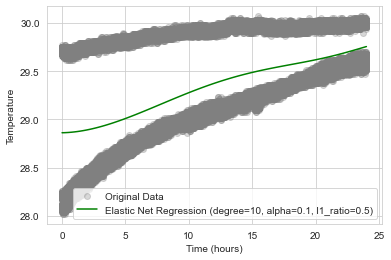

Model:
MSE: 1.0169555574103117
MAE: 0.6933300529406825
R^2: 0.6473473797270287
RMSE: 1.0084421438091091


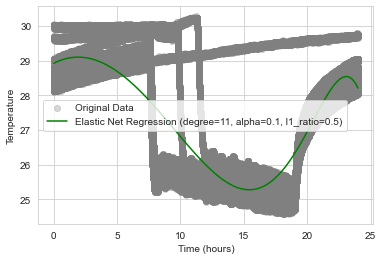

In [45]:
x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['Temperature'])

degree = 10  

alpha = 0.1  
l1_ratio = 0.5  
model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))

model.fit(x, y)

x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Elastic Net Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('Temperature')
plt.legend()
plt.show()


x = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(mon_to_sat_data['Temperature'])

degree = 11  

alpha = 0.1  
l1_ratio = 0.5 
model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Elastic Net Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('Temperature')
plt.legend()
plt.show()


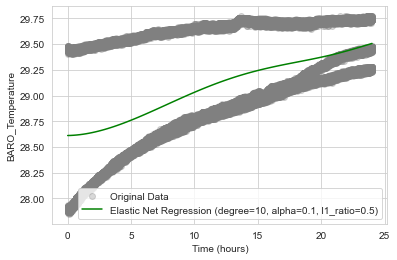

Model:
MSE: 0.9987132754540344
MAE: 0.6857308203383075
R^2: 0.6517171880861763
RMSE: 0.9993564306362542


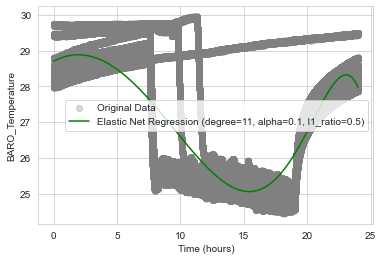

In [43]:
x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['BARO_Temperature'])

degree = 10  

alpha = 0.1  
l1_ratio = 0.5  
model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))

model.fit(x, y)

x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Elastic Net Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('BARO_Temperature')
plt.legend()
plt.show()


x = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(mon_to_sat_data['BARO_Temperature'])

degree = 11  

alpha = 0.1  
l1_ratio = 0.5 
model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Elastic Net Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('BARO_Temperature')
plt.legend()
plt.show()


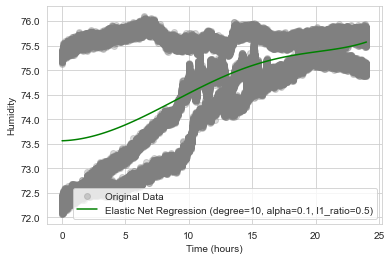

Model:
MSE: 3.948233606270187
MAE: 1.5047898975623846
R^2: 0.301355933068874
RMSE: 1.987016257173098


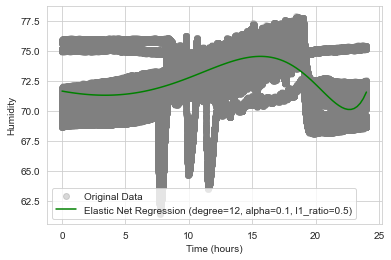

In [44]:
x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['Humidity'])

degree = 10  

alpha = 0.1  
l1_ratio = 0.5  
model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))

model.fit(x, y)

x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Elastic Net Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('Humidity')
plt.legend()
plt.show()


x = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(mon_to_sat_data['Humidity'])

degree = 12  

alpha = 0.1  
l1_ratio = 0.5 
model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))

model.fit(x, y)
accuracy(x,y)
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_values = model.predict(x_values)

plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

plt.plot(x_values, y_values, color='green', label=f'Elastic Net Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('Humidity')
plt.legend()
plt.show()


# ONLY RIDGE 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


Model parameters for Sundays data:
Intercept: 100.77390211875485
Coefficient: [-0.00212354]

Evaluation metrics for Sundays data:
MSE: 0.03
MAE: 0.13
R^2: 0.01
RMSE: 0.16


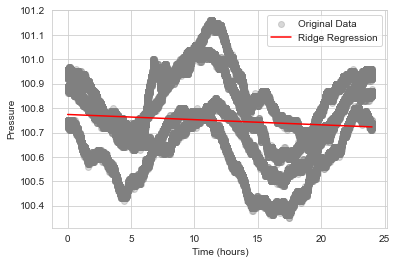

Model parameters for Monday to Saturday data:
Intercept: 100.85967738919841
Coefficient: [-0.00450413]

Evaluation metrics for Monday to Saturday data:
MSE: 0.02
MAE: 0.12
R^2: 0.05
RMSE: 0.14


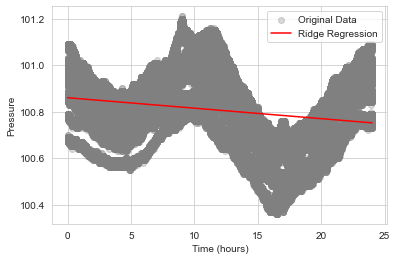

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['Pressure'])

model_sundays = Ridge(alpha=1.0)

model_sundays.fit(x_sundays, y_sundays)

print("Model parameters for Sundays data:")
print("Intercept:", model_sundays.intercept_)
print("Coefficient:", model_sundays.coef_)

y_pred_sundays = model_sundays.predict(x_sundays)

mse_sundays = mean_squared_error(y_sundays, y_pred_sundays)
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays)
r2_sundays = r2_score(y_sundays, y_pred_sundays)
rmse_sundays = sqrt(mse_sundays)

print("\nEvaluation metrics for Sundays data:")
print(f"MSE: {mse_sundays:.2f}")
print(f"MAE: {mae_sundays:.2f}")
print(f"R^2: {r2_sundays:.2f}")
print(f"RMSE: {rmse_sundays:.2f}")

x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays = model_sundays.predict(x_values_sundays)

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data')
plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.show()

x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['Pressure'])

model_mon_to_sat = Ridge(alpha=1.0)

model_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

print("Model parameters for Monday to Saturday data:")
print("Intercept:", model_mon_to_sat.intercept_)
print("Coefficient:", model_mon_to_sat.coef_)

y_pred_mon_to_sat = model_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat)
mae_mon_to_sat = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat)
r2_mon_to_sat = r2_score(y_mon_to_sat, y_pred_mon_to_sat)
rmse_mon_to_sat = sqrt(mse_mon_to_sat)

print("\nEvaluation metrics for Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat:.2f}")
print(f"MAE: {mae_mon_to_sat:.2f}")
print(f"R^2: {r2_mon_to_sat:.2f}")
print(f"RMSE: {rmse_mon_to_sat:.2f}")

x_values_mon_to_sat = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat = model_mon_to_sat.predict(x_values_mon_to_sat)

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data')
plt.plot(x_values_mon_to_sat, y_values_mon_to_sat, color='red', label=f'Ridge Regression')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.show()


Model parameters for Sundays data:
Intercept: 28.759614695686036
Coefficient: [0.04380693]

Evaluation metrics for Sundays data:
MSE: 0.15
MAE: 0.31
R^2: 0.38
RMSE: 0.39


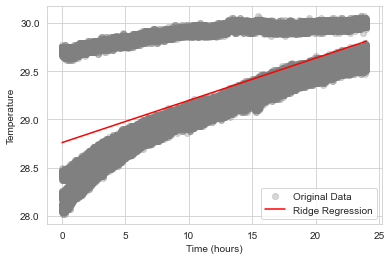

Model parameters for Monday to Saturday data:
Intercept: 28.43751548523226
Coefficient: [-0.10794331]

Evaluation metrics for Monday to Saturday data:
MSE: 2.25
MAE: 1.38
R^2: 0.20
RMSE: 1.50


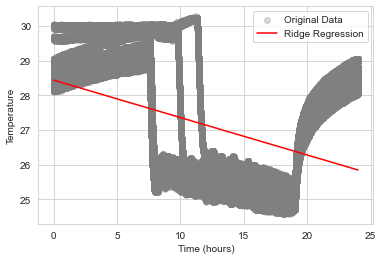

In [29]:

x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['Temperature'])

model_sundays = Ridge(alpha=1.0)

model_sundays.fit(x_sundays, y_sundays)

print("Model parameters for Sundays data:")
print("Intercept:", model_sundays.intercept_)
print("Coefficient:", model_sundays.coef_)

y_pred_sundays = model_sundays.predict(x_sundays)

mse_sundays = mean_squared_error(y_sundays, y_pred_sundays)
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays)
r2_sundays = r2_score(y_sundays, y_pred_sundays)
rmse_sundays = sqrt(mse_sundays)

print("\nEvaluation metrics for Sundays data:")
print(f"MSE: {mse_sundays:.2f}")
print(f"MAE: {mae_sundays:.2f}")
print(f"R^2: {r2_sundays:.2f}")
print(f"RMSE: {rmse_sundays:.2f}")

x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays = model_sundays.predict(x_values_sundays)

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data')
plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression')

plt.xlabel('Time (hours)')
plt.ylabel('Temperature')
plt.legend()
plt.show()

x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['Temperature'])

model_mon_to_sat = Ridge(alpha=1.0)

model_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

print("Model parameters for Monday to Saturday data:")
print("Intercept:", model_mon_to_sat.intercept_)
print("Coefficient:", model_mon_to_sat.coef_)

y_pred_mon_to_sat = model_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat)
mae_mon_to_sat = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat)
r2_mon_to_sat = r2_score(y_mon_to_sat, y_pred_mon_to_sat)
rmse_mon_to_sat = sqrt(mse_mon_to_sat)

print("\nEvaluation metrics for Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat:.2f}")
print(f"MAE: {mae_mon_to_sat:.2f}")
print(f"R^2: {r2_mon_to_sat:.2f}")
print(f"RMSE: {rmse_mon_to_sat:.2f}")

x_values_mon_to_sat = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat = model_mon_to_sat.predict(x_values_mon_to_sat)

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data')
plt.plot(x_values_mon_to_sat, y_values_mon_to_sat, color='red', label=f'Ridge Regression')

plt.xlabel('Time (hours)')
plt.ylabel('Temperature')
plt.legend()
plt.show()


Model parameters for Sundays data:
Intercept: 28.51347784013013
Coefficient: [0.04379476]

Evaluation metrics for Sundays data:
MSE: 0.15
MAE: 0.30
R^2: 0.39
RMSE: 0.38


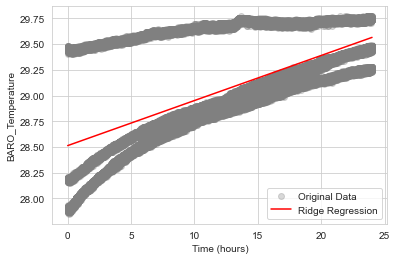

Model parameters for Monday to Saturday data:
Intercept: 28.21919602439489
Coefficient: [-0.10785634]

Evaluation metrics for Monday to Saturday data:
MSE: 2.24
MAE: 1.38
R^2: 0.20
RMSE: 1.50


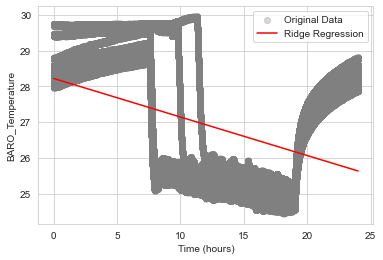

In [30]:

x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['BARO_Temperature'])

model_sundays = Ridge(alpha=1.0)

model_sundays.fit(x_sundays, y_sundays)

print("Model parameters for Sundays data:")
print("Intercept:", model_sundays.intercept_)
print("Coefficient:", model_sundays.coef_)

y_pred_sundays = model_sundays.predict(x_sundays)

mse_sundays = mean_squared_error(y_sundays, y_pred_sundays)
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays)
r2_sundays = r2_score(y_sundays, y_pred_sundays)
rmse_sundays = sqrt(mse_sundays)

print("\nEvaluation metrics for Sundays data:")
print(f"MSE: {mse_sundays:.2f}")
print(f"MAE: {mae_sundays:.2f}")
print(f"R^2: {r2_sundays:.2f}")
print(f"RMSE: {rmse_sundays:.2f}")

x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays = model_sundays.predict(x_values_sundays)

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data')
plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression')

plt.xlabel('Time (hours)')
plt.ylabel('BARO_Temperature')
plt.legend()
plt.show()

x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['BARO_Temperature'])

model_mon_to_sat = Ridge(alpha=1.0)

model_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

print("Model parameters for Monday to Saturday data:")
print("Intercept:", model_mon_to_sat.intercept_)
print("Coefficient:", model_mon_to_sat.coef_)

y_pred_mon_to_sat = model_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat)
mae_mon_to_sat = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat)
r2_mon_to_sat = r2_score(y_mon_to_sat, y_pred_mon_to_sat)
rmse_mon_to_sat = sqrt(mse_mon_to_sat)

print("\nEvaluation metrics for Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat:.2f}")
print(f"MAE: {mae_mon_to_sat:.2f}")
print(f"R^2: {r2_mon_to_sat:.2f}")
print(f"RMSE: {rmse_mon_to_sat:.2f}")

x_values_mon_to_sat = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat = model_mon_to_sat.predict(x_values_mon_to_sat)

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data')
plt.plot(x_values_mon_to_sat, y_values_mon_to_sat, color='red', label=f'Ridge Regression')

plt.xlabel('Time (hours)')
plt.ylabel('BARO_Temperature')
plt.legend()
plt.show()


Model parameters for Sundays data:
Intercept: 73.0397138086148
Coefficient: [0.11644293]

Evaluation metrics for Sundays data:
MSE: 0.85
MAE: 0.67
R^2: 0.43
RMSE: 0.92


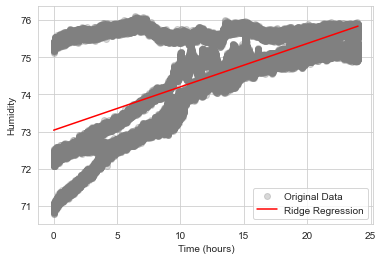

Model parameters for Monday to Saturday data:
Intercept: 72.02167641797965
Coefficient: [0.02498987]

Evaluation metrics for Monday to Saturday data:
MSE: 5.77
MAE: 1.94
R^2: 0.01
RMSE: 2.40


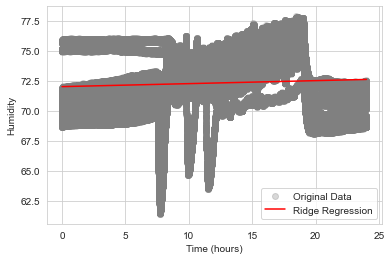

In [31]:

x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['Humidity'])

model_sundays = Ridge(alpha=1.0)

model_sundays.fit(x_sundays, y_sundays)

print("Model parameters for Sundays data:")
print("Intercept:", model_sundays.intercept_)
print("Coefficient:", model_sundays.coef_)

y_pred_sundays = model_sundays.predict(x_sundays)

mse_sundays = mean_squared_error(y_sundays, y_pred_sundays)
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays)
r2_sundays = r2_score(y_sundays, y_pred_sundays)
rmse_sundays = sqrt(mse_sundays)

print("\nEvaluation metrics for Sundays data:")
print(f"MSE: {mse_sundays:.2f}")
print(f"MAE: {mae_sundays:.2f}")
print(f"R^2: {r2_sundays:.2f}")
print(f"RMSE: {rmse_sundays:.2f}")

x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays = model_sundays.predict(x_values_sundays)

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data')
plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression')

plt.xlabel('Time (hours)')
plt.ylabel('Humidity')
plt.legend()
plt.show()

x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['Humidity'])

model_mon_to_sat = Ridge(alpha=1.0)

model_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

print("Model parameters for Monday to Saturday data:")
print("Intercept:", model_mon_to_sat.intercept_)
print("Coefficient:", model_mon_to_sat.coef_)

y_pred_mon_to_sat = model_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat)
mae_mon_to_sat = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat)
r2_mon_to_sat = r2_score(y_mon_to_sat, y_pred_mon_to_sat)
rmse_mon_to_sat = sqrt(mse_mon_to_sat)

print("\nEvaluation metrics for Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat:.2f}")
print(f"MAE: {mae_mon_to_sat:.2f}")
print(f"R^2: {r2_mon_to_sat:.2f}")
print(f"RMSE: {rmse_mon_to_sat:.2f}")

x_values_mon_to_sat = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat = model_mon_to_sat.predict(x_values_mon_to_sat)

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data')
plt.plot(x_values_mon_to_sat, y_values_mon_to_sat, color='red', label=f'Ridge Regression')

plt.xlabel('Time (hours)')
plt.ylabel('Humidity')
plt.legend()
plt.show()


# Ridge and KNN

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor

Model parameters for Sundays data:
Intercept: 100.77390211875485
Coefficient: [-0.00212354]
Model parameters for Monday to Saturday data:
Intercept: 100.85967738919841
Coefficient: [-0.00450413]


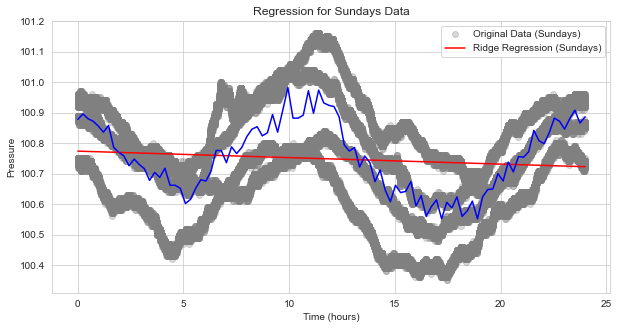

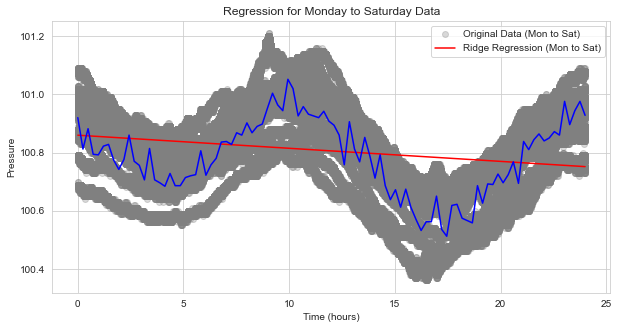

Evaluation metrics for Ridge Regression on Sundays data:
MSE: 0.03
MAE: 0.13
R^2: 0.01
RMSE: 0.16

Evaluation metrics for KNN Regression on Sundays data:
MSE: 0.01
MAE: 0.10
R^2: 0.47
RMSE: 0.12

Evaluation metrics for Ridge Regression on Monday to Saturday data:
MSE: 0.02
MAE: 0.12
R^2: 0.05
RMSE: 0.14

Evaluation metrics for KNN Regression on Monday to Saturday data:
MSE: 0.01
MAE: 0.08
R^2: 0.55
RMSE: 0.10


In [26]:

x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['Pressure'])

model_sundays = Ridge(alpha=1.0)

model_sundays.fit(x_sundays, y_sundays)

print("Model parameters for Sundays data:")
print("Intercept:", model_sundays.intercept_)
print("Coefficient:", model_sundays.coef_)

y_pred_sundays = model_sundays.predict(x_sundays)

mse_sundays = mean_squared_error(y_sundays, y_pred_sundays)
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays)
r2_sundays = r2_score(y_sundays, y_pred_sundays)
rmse_sundays = sqrt(mse_sundays)



x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays = model_sundays.predict(x_values_sundays)



x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['Pressure'])

model_mon_to_sat = Ridge(alpha=1.0)

model_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

print("Model parameters for Monday to Saturday data:")
print("Intercept:", model_mon_to_sat.intercept_)
print("Coefficient:", model_mon_to_sat.coef_)

y_pred_mon_to_sat = model_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat)
mae_mon_to_sat = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat)
r2_mon_to_sat = r2_score(y_mon_to_sat, y_pred_mon_to_sat)
rmse_mon_to_sat = sqrt(mse_mon_to_sat)

x_values_mon_to_sat = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat = model_mon_to_sat.predict(x_values_mon_to_sat)




knn_sundays = KNeighborsRegressor(n_neighbors=5)  
knn_sundays.fit(x_sundays, y_sundays)

y_pred_sundays_knn = knn_sundays.predict(x_sundays)

mse_sundays_knn = mean_squared_error(y_sundays, y_pred_sundays_knn)
mae_sundays_knn = mean_absolute_error(y_sundays, y_pred_sundays_knn)
r2_sundays_knn = r2_score(y_sundays, y_pred_sundays_knn)
rmse_sundays_knn = sqrt(mse_sundays_knn)



knn_mon_to_sat = KNeighborsRegressor(n_neighbors=5)  
knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

y_pred_mon_to_sat_knn = knn_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat_knn = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat_knn)
mae_mon_to_sat_knn = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat_knn)
r2_mon_to_sat_knn = r2_score(y_mon_to_sat, y_pred_mon_to_sat_knn)
rmse_mon_to_sat_knn = sqrt(mse_mon_to_sat_knn)


x_values_sundays_knn = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays_knn = knn_sundays.predict(x_values_sundays_knn)


x_values_mon_to_sat_knn = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat_knn = knn_mon_to_sat.predict(x_values_mon_to_sat_knn)




x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['Pressure'])
x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['Pressure'])

knn_sundays = KNeighborsRegressor(n_neighbors=5)
knn_sundays.fit(x_sundays, y_sundays)


plt.figure(figsize=(10, 5))

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')

plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression (Sundays)')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.title('Regression for Sundays Data')

plt.plot(x_values_sundays_knn, y_values_sundays_knn, color='blue', label=f'KNN Regression (Sundays)')

plt.show()


knn_mon_to_sat = KNeighborsRegressor(n_neighbors=5)
knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)


plt.figure(figsize=(10, 5))

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data (Mon to Sat)')

plt.plot(x_values_mon_to_sat, y_values_mon_to_sat, color='red', label=f'Ridge Regression (Mon to Sat)')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.title('Regression for Monday to Saturday Data')


plt.plot(x_values_mon_to_sat_knn, y_values_mon_to_sat_knn, color='blue', label=f'KNN Regression (Mon to Sat)')

plt.show()

print("Evaluation metrics for Ridge Regression on Sundays data:")
print(f"MSE: {mse_sundays:.2f}")
print(f"MAE: {mae_sundays:.2f}")
print(f"R^2: {r2_sundays:.2f}")
print(f"RMSE: {rmse_sundays:.2f}")

print("\nEvaluation metrics for KNN Regression on Sundays data:")
print(f"MSE: {mse_sundays_knn:.2f}")
print(f"MAE: {mae_sundays_knn:.2f}")
print(f"R^2: {r2_sundays_knn:.2f}")
print(f"RMSE: {rmse_sundays_knn:.2f}")

print("\nEvaluation metrics for Ridge Regression on Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat:.2f}")
print(f"MAE: {mae_mon_to_sat:.2f}")
print(f"R^2: {r2_mon_to_sat:.2f}")
print(f"RMSE: {rmse_mon_to_sat:.2f}")

print("\nEvaluation metrics for KNN Regression on Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat_knn:.2f}")
print(f"MAE: {mae_mon_to_sat_knn:.2f}")
print(f"R^2: {r2_mon_to_sat_knn:.2f}")
print(f"RMSE: {rmse_mon_to_sat_knn:.2f}")



Alpha: 0.0, MSE: 0.03


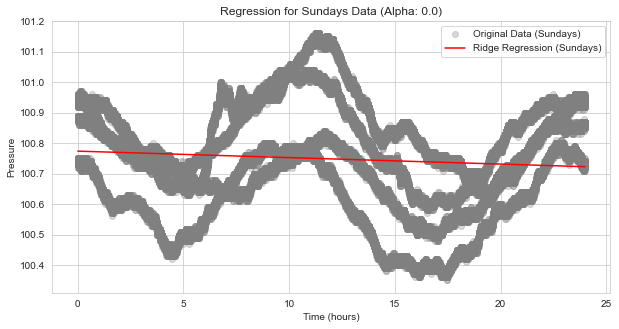

Alpha: 0.1111111111111111, MSE: 0.03


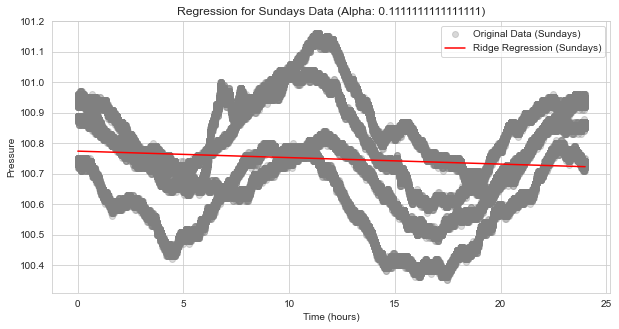

Alpha: 0.2222222222222222, MSE: 0.03


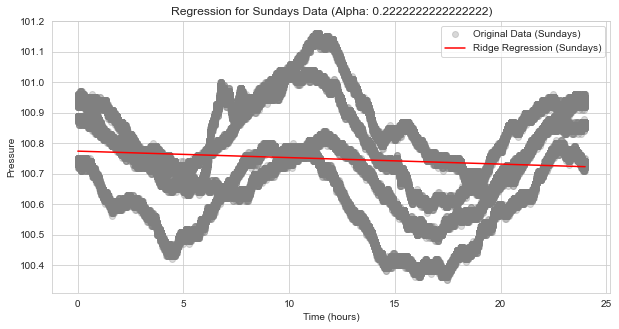

Alpha: 0.3333333333333333, MSE: 0.03


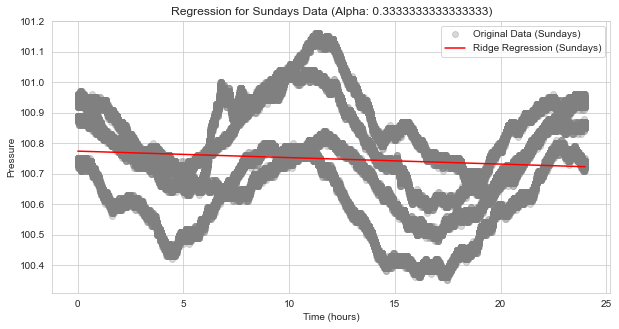

Alpha: 0.4444444444444444, MSE: 0.03


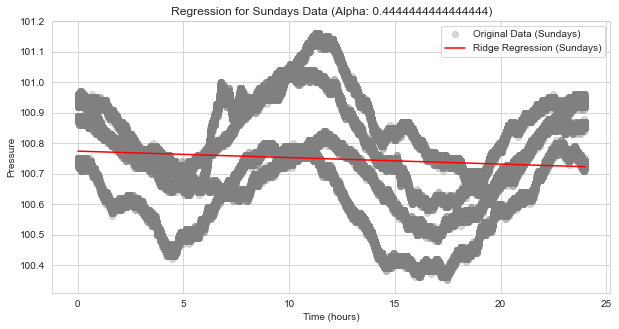

Alpha: 0.5555555555555556, MSE: 0.03


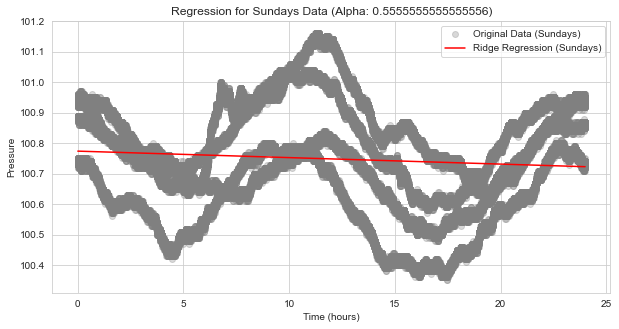

Alpha: 0.6666666666666666, MSE: 0.03


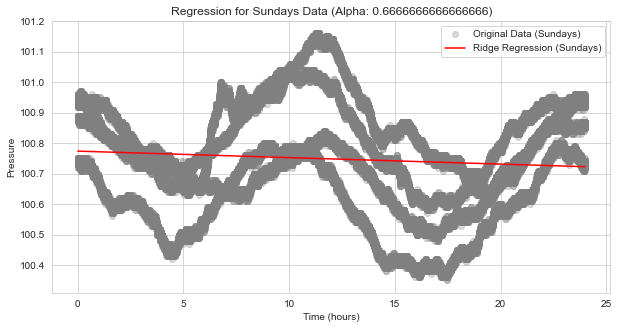

Alpha: 0.7777777777777777, MSE: 0.03


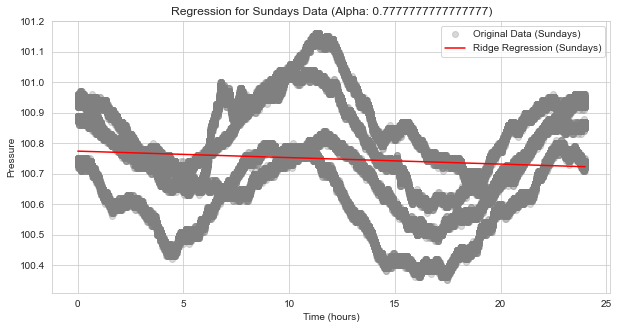

Alpha: 0.8888888888888888, MSE: 0.03


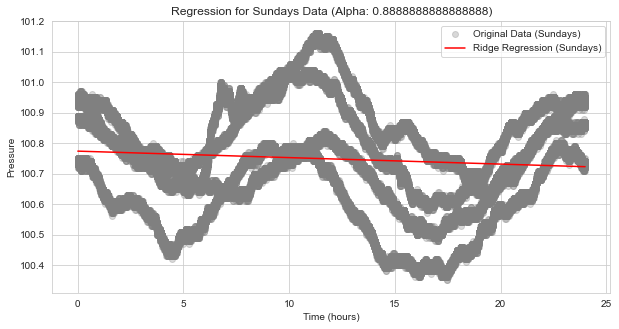

Alpha: 1.0, MSE: 0.03


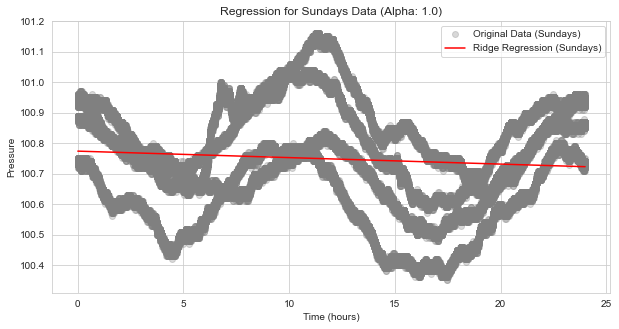

Best alpha: 0.3333333333333333
Best MSE: 0.02505564778380031
Model parameters for Sundays data:
Intercept: 100.77390211995954
Coefficient: [-0.00212354]
Evaluation metrics for Ridge Regression on Sundays data:
MSE: 0.03
MAE: 0.13
R^2: 0.01
RMSE: 0.16


In [27]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 创建一个范围内的alpha值列表，例如0到1之间的10个值
alphas = np.linspace(0, 1, 10)

for alpha in alphas:
    model_sundays = Ridge(alpha=alpha)
    model_sundays.fit(x_sundays, y_sundays)
    
    # 使用交叉验证评估模型性能
    scores = cross_val_score(model_sundays, x_sundays, y_sundays, cv=5, scoring='neg_mean_squared_error')
    
    # 计算平均均方误差
    avg_mse = -np.mean(scores)
    
    print(f"Alpha: {alpha}, MSE: {avg_mse:.2f}")
    
    # 使用最佳alpha来绘制模型图形
    x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
    y_values_sundays = model_sundays.predict(x_values_sundays)
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')
    
    plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression (Sundays)')
    
    plt.xlabel('Time (hours)')
    plt.ylabel('Pressure')
    plt.legend()
    plt.title(f'Regression for Sundays Data (Alpha: {alpha})')
    
    plt.show()

# 选择最佳alpha
best_alpha = alphas[np.argmin(scores)]

# 使用最佳alpha来训练最终的Ridge回归模型
final_model = Ridge(alpha=best_alpha)
final_model.fit(x_sundays, y_sundays)
y_pred_sundays = final_model.predict(x_sundays)

mse_sundays = mean_squared_error(y_sundays, y_pred_sundays)
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays)
r2_sundays = r2_score(y_sundays, y_pred_sundays)
rmse_sundays = sqrt(mse_sundays)

# 打印最终的性能指标
print("Best alpha:", best_alpha)
print("Best MSE:", mse_sundays)
print("Model parameters for Sundays data:")
print("Intercept:", final_model.intercept_)
print("Coefficient:", final_model.coef_)
print("Evaluation metrics for Ridge Regression on Sundays data:")
print(f"MSE: {mse_sundays:.2f}")
print(f"MAE: {mae_sundays:.2f}")
print(f"R^2: {r2_sundays:.2f}")
print(f"RMSE: {rmse_sundays:.2f}")


Lasso Alpha: 0.0, MSE: 0.03


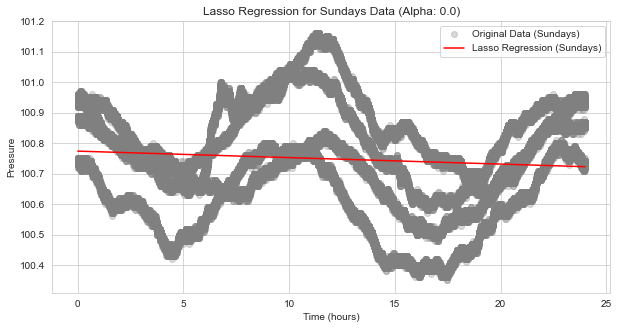

Lasso Alpha: 0.1111111111111111, MSE: 0.03


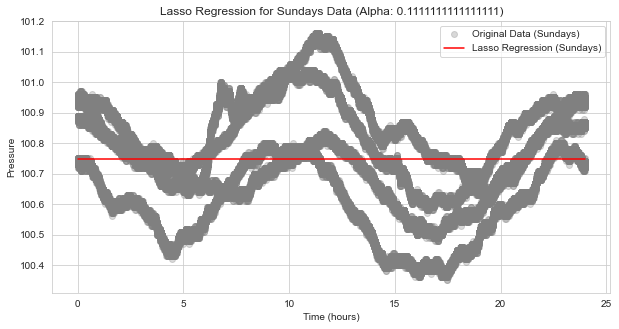

Lasso Alpha: 0.2222222222222222, MSE: 0.03


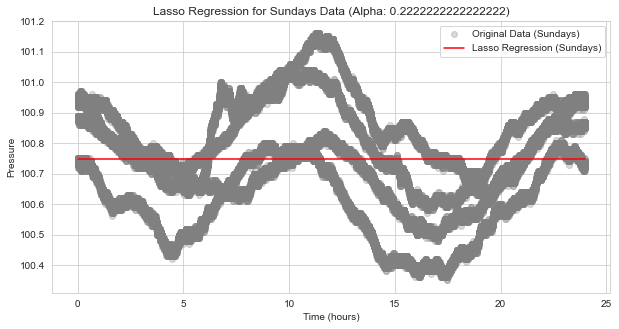

Lasso Alpha: 0.3333333333333333, MSE: 0.03


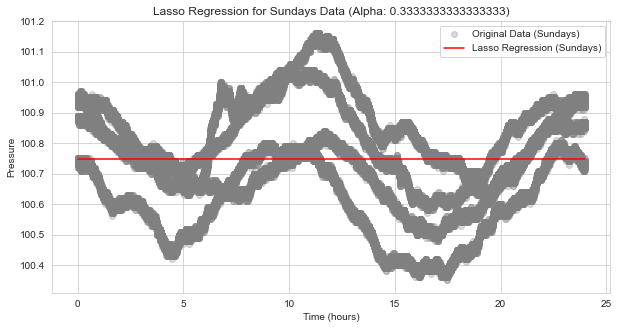

Lasso Alpha: 0.4444444444444444, MSE: 0.03


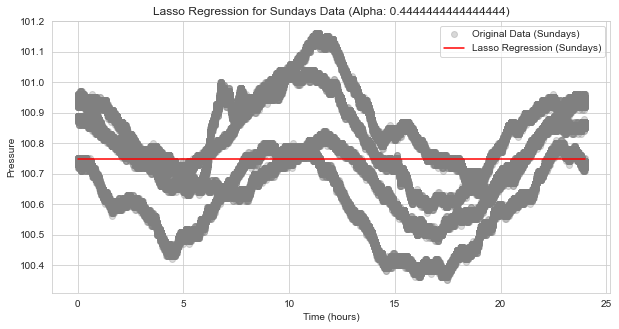

Lasso Alpha: 0.5555555555555556, MSE: 0.03


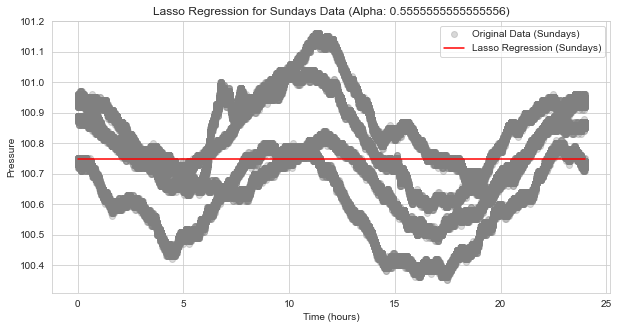

Lasso Alpha: 0.6666666666666666, MSE: 0.03


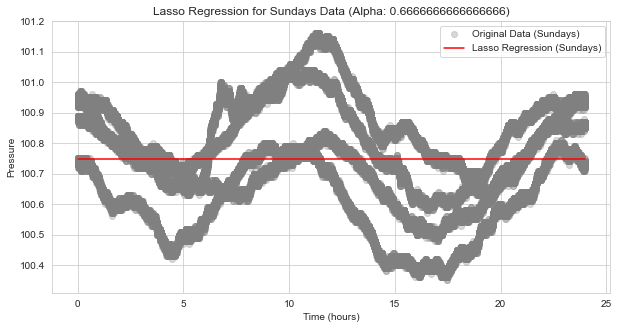

Lasso Alpha: 0.7777777777777777, MSE: 0.03


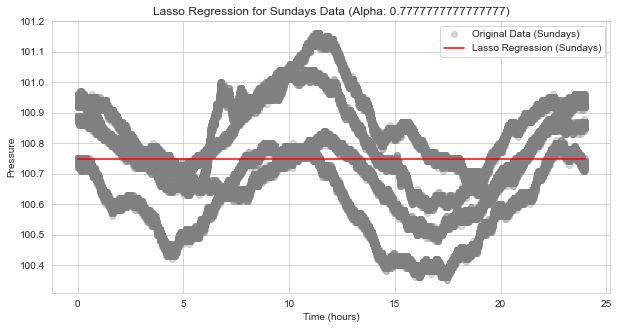

Lasso Alpha: 0.8888888888888888, MSE: 0.03


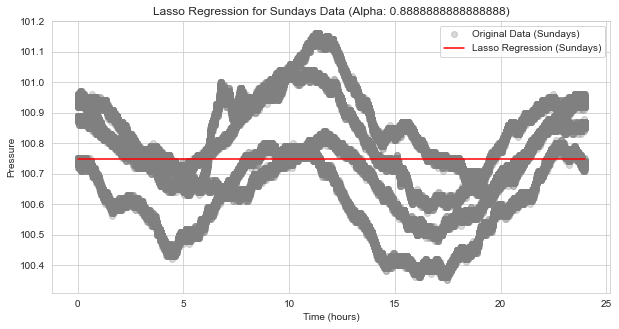

Lasso Alpha: 1.0, MSE: 0.03


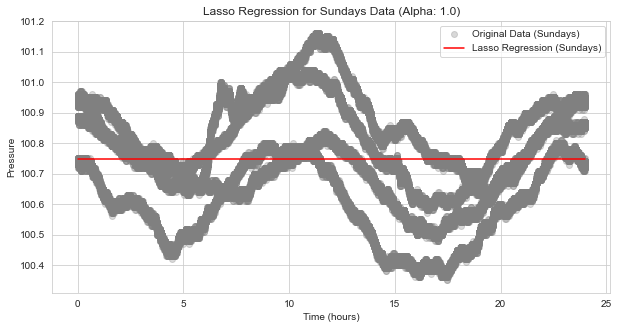

Best Lasso Alpha: 0.3333333333333333
Best Lasso MSE: 0.02527212262299225
Model parameters for Lasso Regression on Sundays data:
Intercept: 100.7487689355372
Coefficient: [-0.]
Evaluation metrics for Lasso Regression on Sundays data:
MSE: 0.03
MAE: 0.13
R^2: 0.00
RMSE: 0.16


In [28]:
from sklearn.linear_model import Lasso

alphas = np.linspace(0, 1, 10)

for alpha in alphas:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(x_sundays, y_sundays)
    
    scores = cross_val_score(model_lasso, x_sundays, y_sundays, cv=5, scoring='neg_mean_squared_error')
    
    avg_mse = -np.mean(scores)
    
    print(f"Lasso Alpha: {alpha}, MSE: {avg_mse:.2f}")
    
    x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
    y_values_sundays = model_lasso.predict(x_values_sundays)
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')
    
    plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Lasso Regression (Sundays)')
    
    plt.xlabel('Time (hours)')
    plt.ylabel('Pressure')
    plt.legend()
    plt.title(f'Lasso Regression for Sundays Data (Alpha: {alpha})')
    
    plt.show()

best_alpha_lasso = alphas[np.argmin(scores)]

final_model_lasso = Lasso(alpha=best_alpha_lasso)
final_model_lasso.fit(x_sundays, y_sundays)
y_pred_sundays_lasso = final_model_lasso.predict(x_sundays)

mse_sundays_lasso = mean_squared_error(y_sundays, y_pred_sundays_lasso)
mae_sundays_lasso = mean_absolute_error(y_sundays, y_pred_sundays_lasso)
r2_sundays_lasso = r2_score(y_sundays, y_pred_sundays_lasso)
rmse_sundays_lasso = sqrt(mse_sundays_lasso)

print("Best Lasso Alpha:", best_alpha_lasso)
print("Best Lasso MSE:", mse_sundays_lasso)
print("Model parameters for Lasso Regression on Sundays data:")
print("Intercept:", final_model_lasso.intercept_)
print("Coefficient:", final_model_lasso.coef_)
print("Evaluation metrics for Lasso Regression on Sundays data:")
print(f"MSE: {mse_sundays_lasso:.2f}")
print(f"MAE: {mae_sundays_lasso:.2f}")
print(f"R^2: {r2_sundays_lasso:.2f}")
print(f"RMSE: {rmse_sundays_lasso:.2f}")


Elastic Net Alpha: 0.0, MSE: 0.03


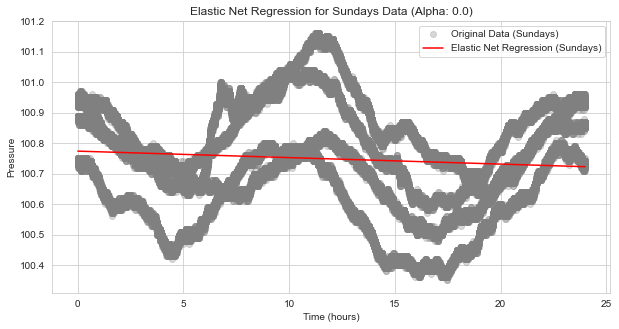

Elastic Net Alpha: 0.1111111111111111, MSE: 0.03


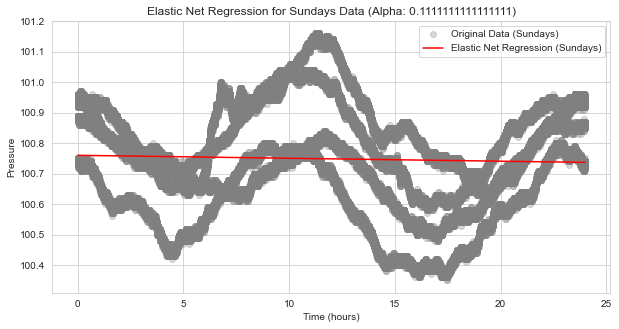

Elastic Net Alpha: 0.2222222222222222, MSE: 0.03


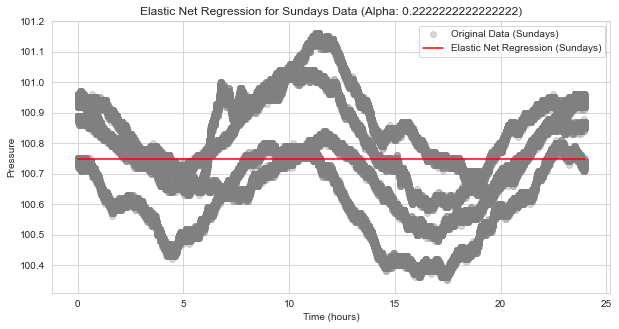

Elastic Net Alpha: 0.3333333333333333, MSE: 0.03


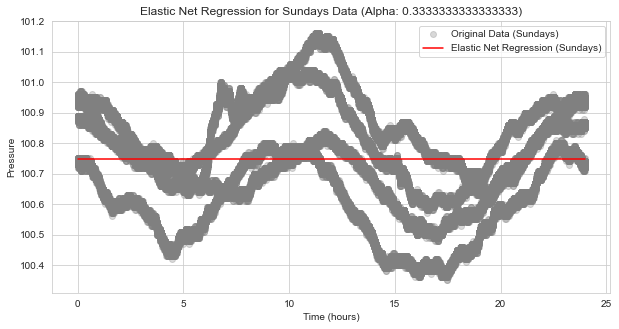

Elastic Net Alpha: 0.4444444444444444, MSE: 0.03


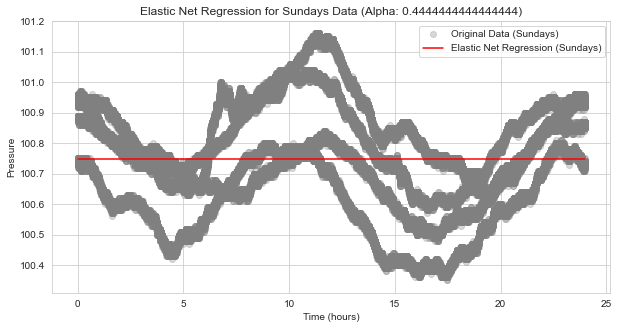

Elastic Net Alpha: 0.5555555555555556, MSE: 0.03


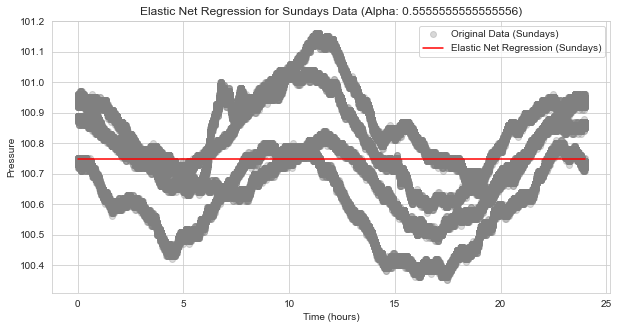

Elastic Net Alpha: 0.6666666666666666, MSE: 0.03


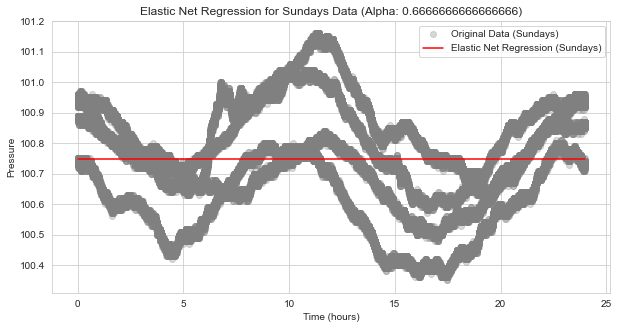

Elastic Net Alpha: 0.7777777777777777, MSE: 0.03


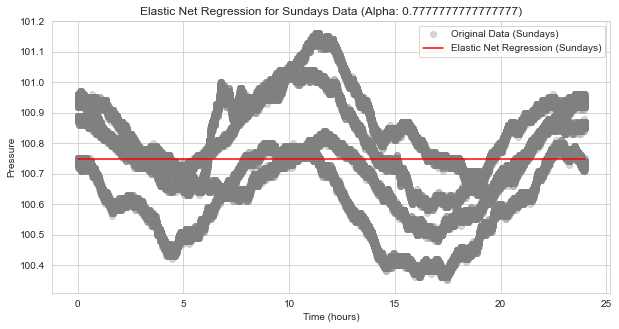

Elastic Net Alpha: 0.8888888888888888, MSE: 0.03


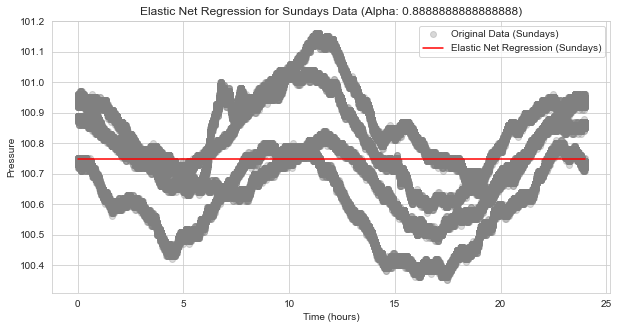

Elastic Net Alpha: 1.0, MSE: 0.03


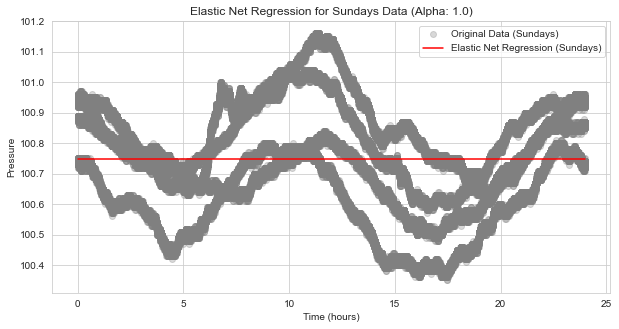

Best Elastic Net Alpha: 0.3333333333333333
Best Elastic Net MSE: 0.02527212262299225
Model parameters for Elastic Net Regression on Sundays data:
Intercept: 100.7487689355372
Coefficient: [-0.]
Evaluation metrics for Elastic Net Regression on Sundays data:
MSE: 0.03
MAE: 0.13
R^2: 0.00
RMSE: 0.16


In [29]:
from sklearn.linear_model import ElasticNet

alphas = np.linspace(0, 1, 10)

for alpha in alphas:
    model_elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)  
    model_elastic_net.fit(x_sundays, y_sundays)
    scores = cross_val_score(model_elastic_net, x_sundays, y_sundays, cv=5, scoring='neg_mean_squared_error')
    
    avg_mse = -np.mean(scores)
    
    print(f"Elastic Net Alpha: {alpha}, MSE: {avg_mse:.2f}")
    
    x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
    y_values_sundays = model_elastic_net.predict(x_values_sundays)
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')
    
    plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Elastic Net Regression (Sundays)')
    
    plt.xlabel('Time (hours)')
    plt.ylabel('Pressure')
    plt.legend()
    plt.title(f'Elastic Net Regression for Sundays Data (Alpha: {alpha})')
    
    plt.show()

best_alpha_elastic_net = alphas[np.argmin(scores)]

final_model_elastic_net = ElasticNet(alpha=best_alpha_elastic_net, l1_ratio=0.5)
final_model_elastic_net.fit(x_sundays, y_sundays)
y_pred_sundays_elastic_net = final_model_elastic_net.predict(x_sundays)

mse_sundays_elastic_net = mean_squared_error(y_sundays, y_pred_sundays_elastic_net)
mae_sundays_elastic_net = mean_absolute_error(y_sundays, y_pred_sundays_elastic_net)
r2_sundays_elastic_net = r2_score(y_sundays, y_pred_sundays_elastic_net)
rmse_sundays_elastic_net = sqrt(mse_sundays_elastic_net)

print("Best Elastic Net Alpha:", best_alpha_elastic_net)
print("Best Elastic Net MSE:", mse_sundays_elastic_net)
print("Model parameters for Elastic Net Regression on Sundays data:")
print("Intercept:", final_model_elastic_net.intercept_)
print("Coefficient:", final_model_elastic_net.coef_)
print("Evaluation metrics for Elastic Net Regression on Sundays data:")
print(f"MSE: {mse_sundays_elastic_net:.2f}")
print(f"MAE: {mae_sundays_elastic_net:.2f}")
print(f"R^2: {r2_sundays_elastic_net:.2f}")
print(f"RMSE: {rmse_sundays_elastic_net:.2f}")


Model parameters for Sundays data:
Intercept: 28.759614695686036
Coefficient: [0.04380693]
Model parameters for Monday to Saturday data:
Intercept: 28.43751548523226
Coefficient: [-0.10794331]


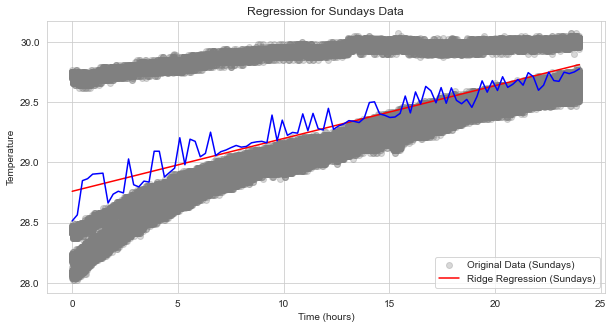

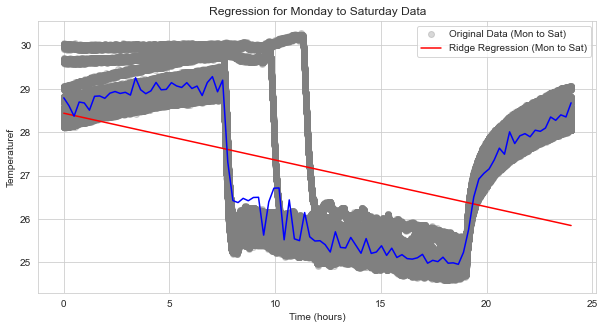

Evaluation metrics for Ridge Regression on Sundays data:
MSE: 0.15
MAE: 0.31
R^2: 0.38
RMSE: 0.39

Evaluation metrics for KNN Regression on Sundays data:
MSE: 0.15
MAE: 0.30
R^2: 0.39
RMSE: 0.39

Evaluation metrics for Ridge Regression on Monday to Saturday data:
MSE: 2.25
MAE: 1.38
R^2: 0.20
RMSE: 1.50

Evaluation metrics for KNN Regression on Monday to Saturday data:
MSE: 0.41
MAE: 0.36
R^2: 0.86
RMSE: 0.64


In [21]:

x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['Temperature'])

model_sundays = Ridge(alpha=1.0)

model_sundays.fit(x_sundays, y_sundays)

print("Model parameters for Sundays data:")
print("Intercept:", model_sundays.intercept_)
print("Coefficient:", model_sundays.coef_)

y_pred_sundays = model_sundays.predict(x_sundays)

mse_sundays = mean_squared_error(y_sundays, y_pred_sundays)
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays)
r2_sundays = r2_score(y_sundays, y_pred_sundays)
rmse_sundays = sqrt(mse_sundays)



x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays = model_sundays.predict(x_values_sundays)



x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['Temperature'])

model_mon_to_sat = Ridge(alpha=1.0)

model_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

print("Model parameters for Monday to Saturday data:")
print("Intercept:", model_mon_to_sat.intercept_)
print("Coefficient:", model_mon_to_sat.coef_)

y_pred_mon_to_sat = model_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat)
mae_mon_to_sat = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat)
r2_mon_to_sat = r2_score(y_mon_to_sat, y_pred_mon_to_sat)
rmse_mon_to_sat = sqrt(mse_mon_to_sat)

x_values_mon_to_sat = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat = model_mon_to_sat.predict(x_values_mon_to_sat)




knn_sundays = KNeighborsRegressor(n_neighbors=5)  
knn_sundays.fit(x_sundays, y_sundays)

y_pred_sundays_knn = knn_sundays.predict(x_sundays)

mse_sundays_knn = mean_squared_error(y_sundays, y_pred_sundays_knn)
mae_sundays_knn = mean_absolute_error(y_sundays, y_pred_sundays_knn)
r2_sundays_knn = r2_score(y_sundays, y_pred_sundays_knn)
rmse_sundays_knn = sqrt(mse_sundays_knn)



knn_mon_to_sat = KNeighborsRegressor(n_neighbors=5)  
knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

y_pred_mon_to_sat_knn = knn_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat_knn = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat_knn)
mae_mon_to_sat_knn = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat_knn)
r2_mon_to_sat_knn = r2_score(y_mon_to_sat, y_pred_mon_to_sat_knn)
rmse_mon_to_sat_knn = sqrt(mse_mon_to_sat_knn)


x_values_sundays_knn = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays_knn = knn_sundays.predict(x_values_sundays_knn)


x_values_mon_to_sat_knn = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat_knn = knn_mon_to_sat.predict(x_values_mon_to_sat_knn)




x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['Temperature'])
x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['Temperature'])

knn_sundays = KNeighborsRegressor(n_neighbors=5)
knn_sundays.fit(x_sundays, y_sundays)


plt.figure(figsize=(10, 5))

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')

plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression (Sundays)')

plt.xlabel('Time (hours)')
plt.ylabel('Temperature')
plt.legend()
plt.title('Regression for Sundays Data')

plt.plot(x_values_sundays_knn, y_values_sundays_knn, color='blue', label=f'KNN Regression (Sundays)')

plt.show()


knn_mon_to_sat = KNeighborsRegressor(n_neighbors=5)
knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)


plt.figure(figsize=(10, 5))

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data (Mon to Sat)')

plt.plot(x_values_mon_to_sat, y_values_mon_to_sat, color='red', label=f'Ridge Regression (Mon to Sat)')

plt.xlabel('Time (hours)')
plt.ylabel('Temperaturef')
plt.legend()
plt.title('Regression for Monday to Saturday Data')


plt.plot(x_values_mon_to_sat_knn, y_values_mon_to_sat_knn, color='blue', label=f'KNN Regression (Mon to Sat)')

plt.show()

print("Evaluation metrics for Ridge Regression on Sundays data:")
print(f"MSE: {mse_sundays:.2f}")
print(f"MAE: {mae_sundays:.2f}")
print(f"R^2: {r2_sundays:.2f}")
print(f"RMSE: {rmse_sundays:.2f}")

print("\nEvaluation metrics for KNN Regression on Sundays data:")
print(f"MSE: {mse_sundays_knn:.2f}")
print(f"MAE: {mae_sundays_knn:.2f}")
print(f"R^2: {r2_sundays_knn:.2f}")
print(f"RMSE: {rmse_sundays_knn:.2f}")

print("\nEvaluation metrics for Ridge Regression on Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat:.2f}")
print(f"MAE: {mae_mon_to_sat:.2f}")
print(f"R^2: {r2_mon_to_sat:.2f}")
print(f"RMSE: {rmse_mon_to_sat:.2f}")

print("\nEvaluation metrics for KNN Regression on Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat_knn:.2f}")
print(f"MAE: {mae_mon_to_sat_knn:.2f}")
print(f"R^2: {r2_mon_to_sat_knn:.2f}")
print(f"RMSE: {rmse_mon_to_sat_knn:.2f}")



Alpha: 0.0, MSE: 0.25


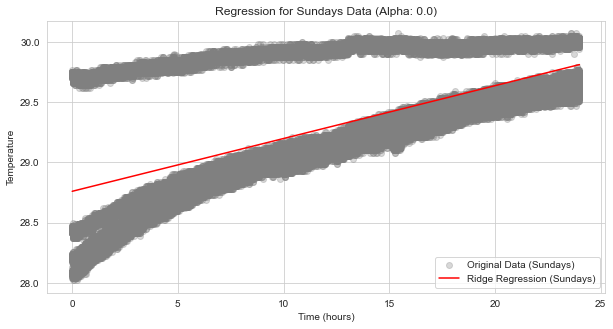

Alpha: 0.1111111111111111, MSE: 0.25


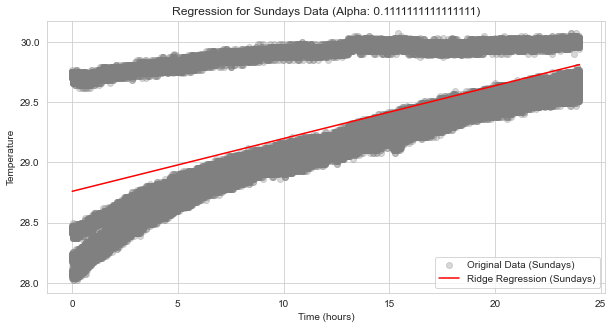

Alpha: 0.2222222222222222, MSE: 0.25


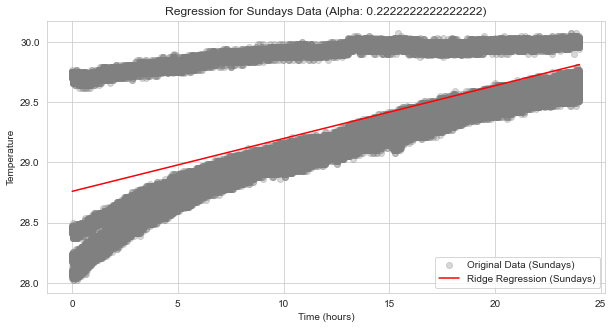

Alpha: 0.3333333333333333, MSE: 0.25


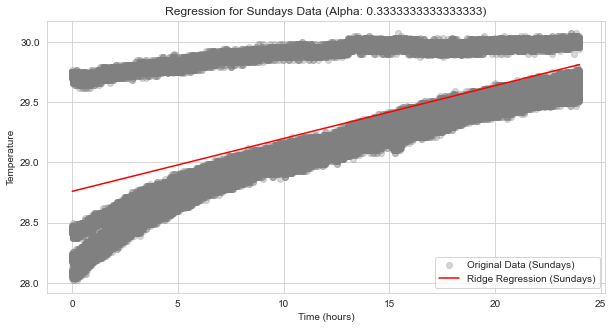

Alpha: 0.4444444444444444, MSE: 0.25


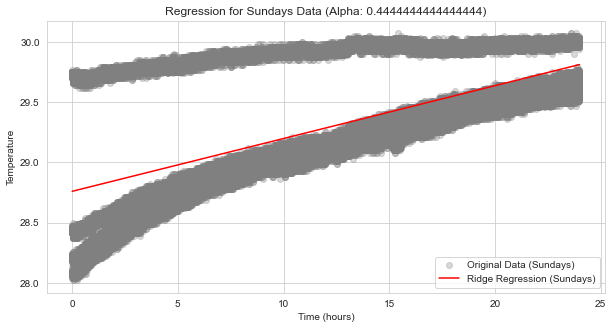

Alpha: 0.5555555555555556, MSE: 0.25


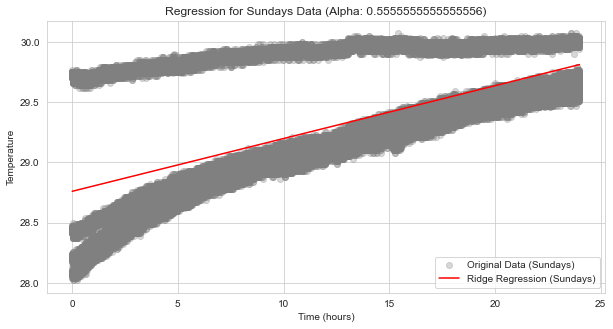

Alpha: 0.6666666666666666, MSE: 0.25


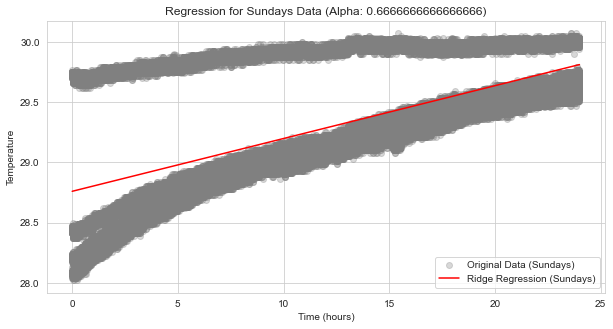

Alpha: 0.7777777777777777, MSE: 0.25


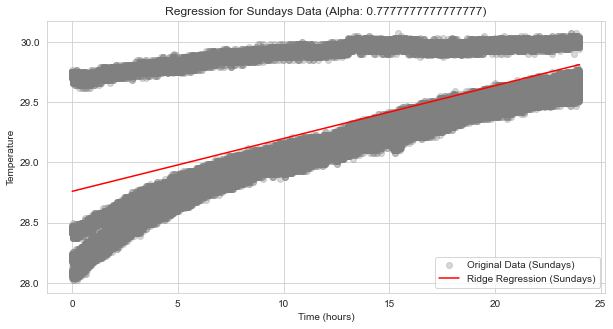

Alpha: 0.8888888888888888, MSE: 0.25


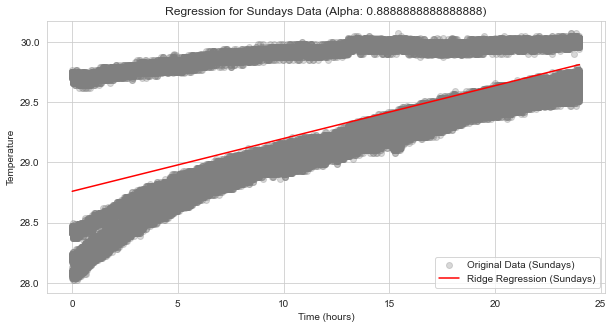

Alpha: 1.0, MSE: 0.25


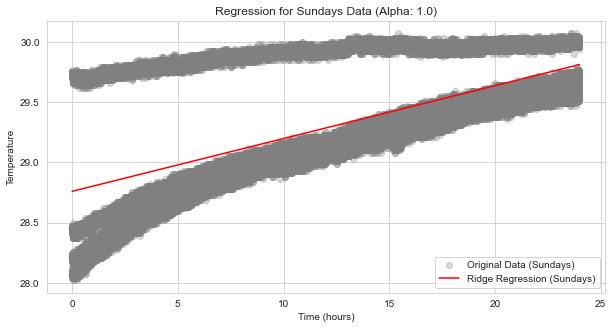

Best alpha: 0.1111111111111111
Best MSE: 0.15097590176973258
Model parameters for Sundays data:
Intercept: 28.759614662550522
Coefficient: [0.04380693]
Evaluation metrics for Ridge Regression on Sundays data:
MSE: 0.15
MAE: 0.31
R^2: 0.38
RMSE: 0.39


In [23]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 创建一个范围内的alpha值列表，例如0到1之间的10个值
alphas = np.linspace(0, 1, 10)

for alpha in alphas:
    model_sundays = Ridge(alpha=alpha)
    model_sundays.fit(x_sundays, y_sundays)
    
    # 使用交叉验证评估模型性能
    scores = cross_val_score(model_sundays, x_sundays, y_sundays, cv=5, scoring='neg_mean_squared_error')
    
    # 计算平均均方误差
    avg_mse = -np.mean(scores)
    
    print(f"Alpha: {alpha}, MSE: {avg_mse:.2f}")
    
    # 使用最佳alpha来绘制模型图形
    x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
    y_values_sundays = model_sundays.predict(x_values_sundays)
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')
    
    plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression (Sundays)')
    
    plt.xlabel('Time (hours)')
    plt.ylabel('Temperature')
    plt.legend()
    plt.title(f'Regression for Sundays Data (Alpha: {alpha})')
    
    plt.show()

# 选择最佳alpha
best_alpha = alphas[np.argmin(scores)]

# 使用最佳alpha来训练最终的Ridge回归模型
final_model = Ridge(alpha=best_alpha)
final_model.fit(x_sundays, y_sundays)
y_pred_sundays = final_model.predict(x_sundays)

mse_sundays = mean_squared_error(y_sundays, y_pred_sundays)
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays)
r2_sundays = r2_score(y_sundays, y_pred_sundays)
rmse_sundays = sqrt(mse_sundays)

# 打印最终的性能指标
print("Best alpha:", best_alpha)
print("Best MSE:", mse_sundays)
print("Model parameters for Sundays data:")
print("Intercept:", final_model.intercept_)
print("Coefficient:", final_model.coef_)
print("Evaluation metrics for Ridge Regression on Sundays data:")
print(f"MSE: {mse_sundays:.2f}")
print(f"MAE: {mae_sundays:.2f}")
print(f"R^2: {r2_sundays:.2f}")
print(f"RMSE: {rmse_sundays:.2f}")


Lasso Alpha: 0.0, MSE: 0.25


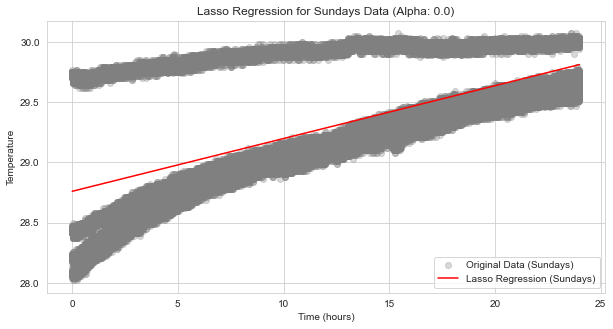

Lasso Alpha: 0.1111111111111111, MSE: 0.25


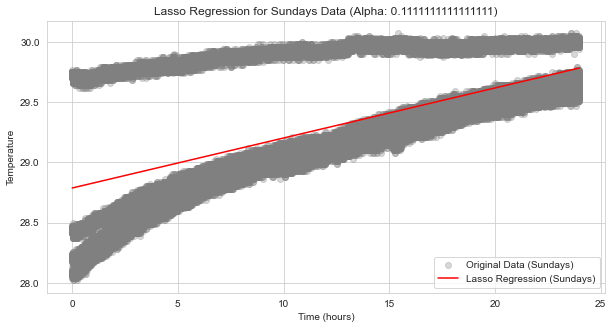

Lasso Alpha: 0.2222222222222222, MSE: 0.26


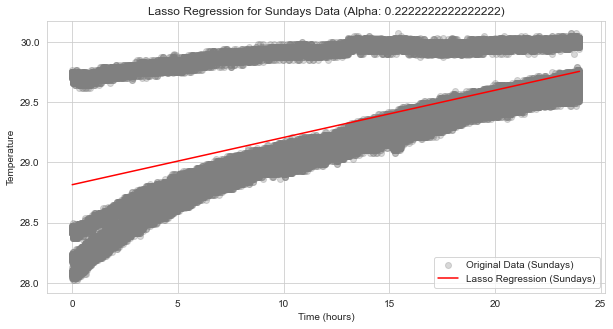

Lasso Alpha: 0.3333333333333333, MSE: 0.26


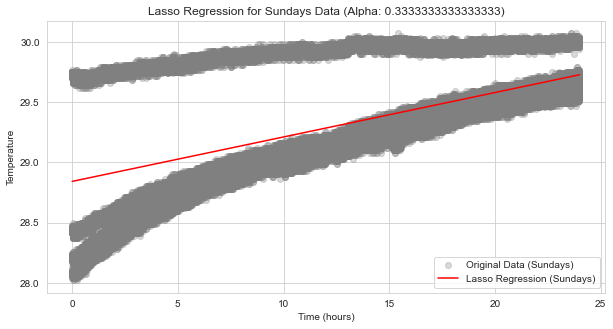

Lasso Alpha: 0.4444444444444444, MSE: 0.26


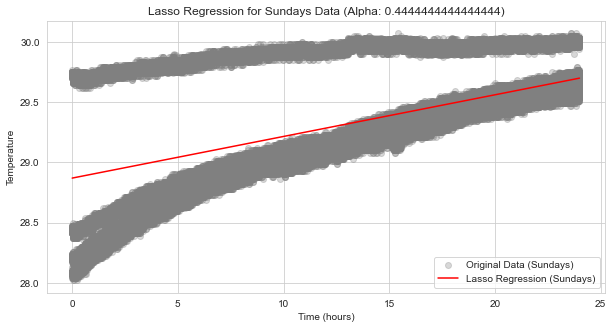

Lasso Alpha: 0.5555555555555556, MSE: 0.26


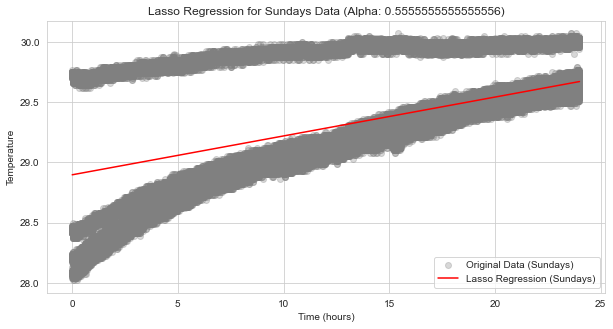

Lasso Alpha: 0.6666666666666666, MSE: 0.26


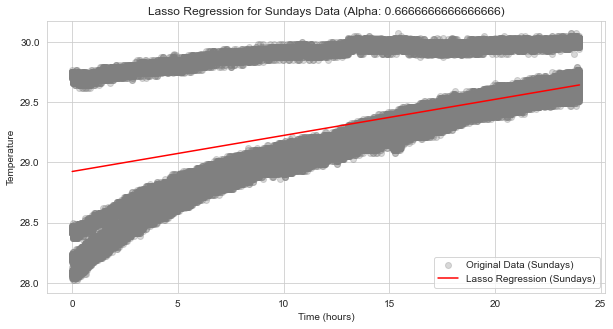

Lasso Alpha: 0.7777777777777777, MSE: 0.27


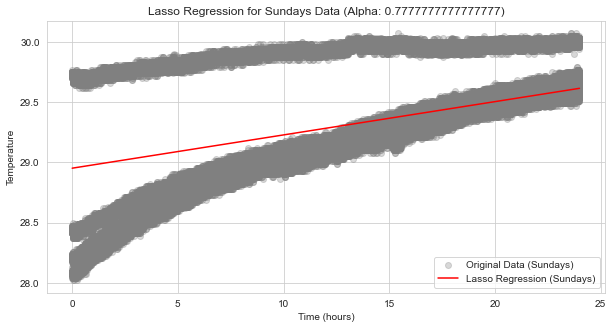

Lasso Alpha: 0.8888888888888888, MSE: 0.27


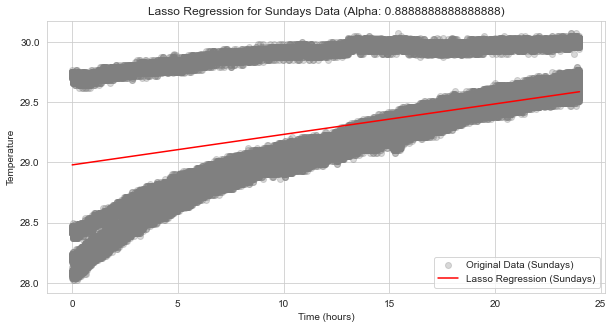

Lasso Alpha: 1.0, MSE: 0.27


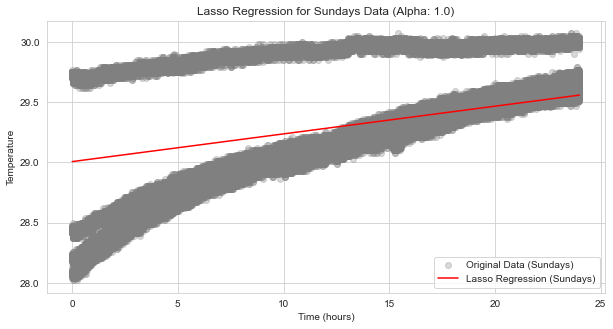

Best Lasso Alpha: 0.1111111111111111
Best Lasso MSE: 0.15123307760377003
Model parameters for Lasso Regression on Sundays data:
Intercept: 28.787008875560065
Coefficient: [0.04149235]
Evaluation metrics for Lasso Regression on Sundays data:
MSE: 0.15
MAE: 0.31
R^2: 0.38
RMSE: 0.39


In [24]:
from sklearn.linear_model import Lasso

alphas = np.linspace(0, 1, 10)

for alpha in alphas:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(x_sundays, y_sundays)
    
    scores = cross_val_score(model_lasso, x_sundays, y_sundays, cv=5, scoring='neg_mean_squared_error')
    
    avg_mse = -np.mean(scores)
    
    print(f"Lasso Alpha: {alpha}, MSE: {avg_mse:.2f}")
    
    x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
    y_values_sundays = model_lasso.predict(x_values_sundays)
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')
    
    plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Lasso Regression (Sundays)')
    
    plt.xlabel('Time (hours)')
    plt.ylabel('Temperature')
    plt.legend()
    plt.title(f'Lasso Regression for Sundays Data (Alpha: {alpha})')
    
    plt.show()

best_alpha_lasso = alphas[np.argmin(scores)]

final_model_lasso = Lasso(alpha=best_alpha_lasso)
final_model_lasso.fit(x_sundays, y_sundays)
y_pred_sundays_lasso = final_model_lasso.predict(x_sundays)

mse_sundays_lasso = mean_squared_error(y_sundays, y_pred_sundays_lasso)
mae_sundays_lasso = mean_absolute_error(y_sundays, y_pred_sundays_lasso)
r2_sundays_lasso = r2_score(y_sundays, y_pred_sundays_lasso)
rmse_sundays_lasso = sqrt(mse_sundays_lasso)

print("Best Lasso Alpha:", best_alpha_lasso)
print("Best Lasso MSE:", mse_sundays_lasso)
print("Model parameters for Lasso Regression on Sundays data:")
print("Intercept:", final_model_lasso.intercept_)
print("Coefficient:", final_model_lasso.coef_)
print("Evaluation metrics for Lasso Regression on Sundays data:")
print(f"MSE: {mse_sundays_lasso:.2f}")
print(f"MAE: {mae_sundays_lasso:.2f}")
print(f"R^2: {r2_sundays_lasso:.2f}")
print(f"RMSE: {rmse_sundays_lasso:.2f}")


Elastic Net Alpha: 0.0, MSE: 0.25


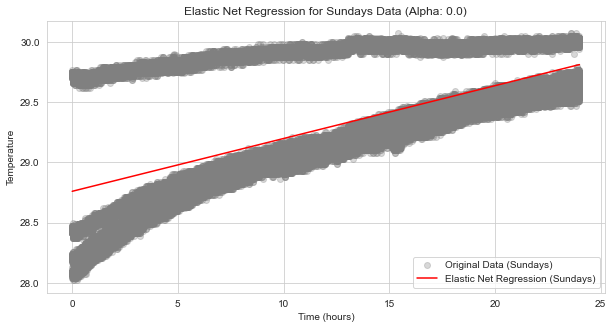

Elastic Net Alpha: 0.1111111111111111, MSE: 0.25


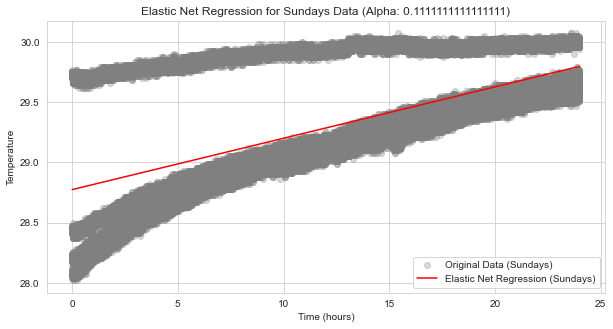

Elastic Net Alpha: 0.2222222222222222, MSE: 0.25


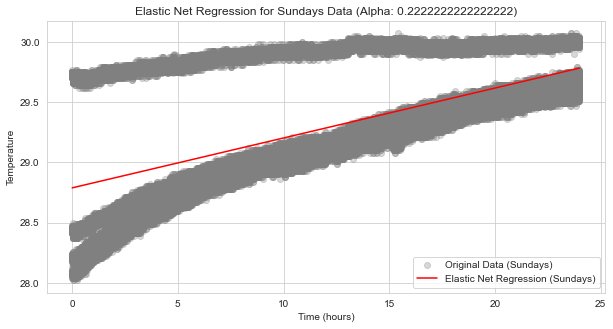

Elastic Net Alpha: 0.3333333333333333, MSE: 0.25


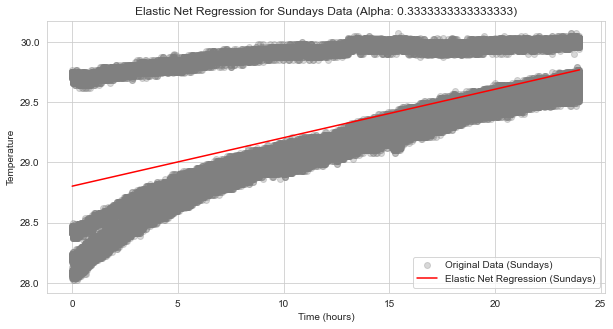

Elastic Net Alpha: 0.4444444444444444, MSE: 0.26


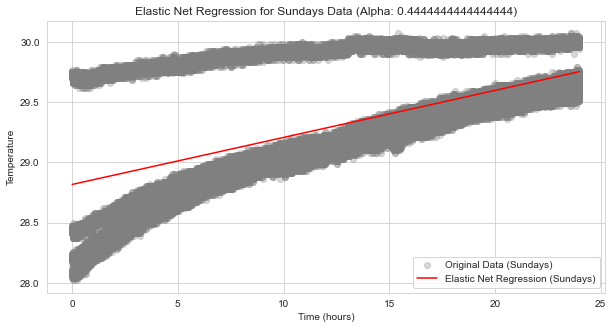

Elastic Net Alpha: 0.5555555555555556, MSE: 0.26


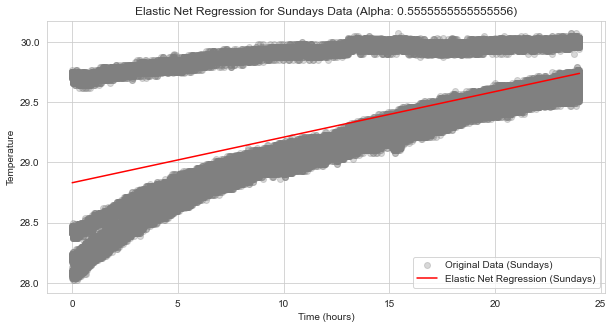

Elastic Net Alpha: 0.6666666666666666, MSE: 0.26


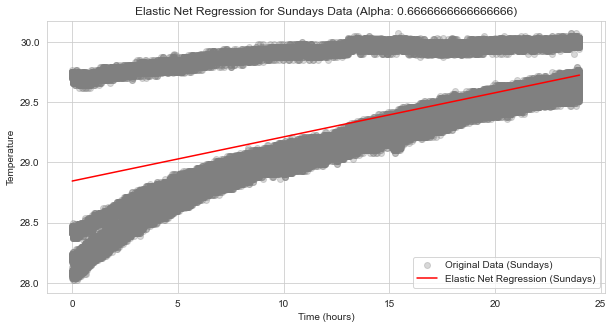

Elastic Net Alpha: 0.7777777777777777, MSE: 0.26


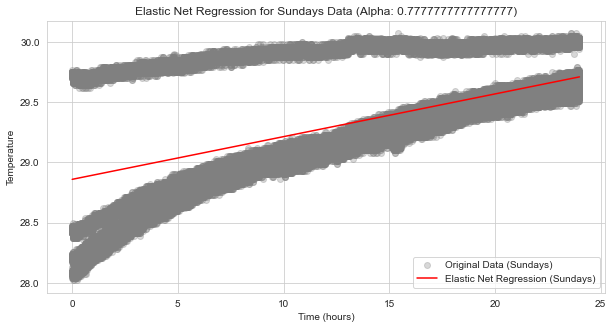

Elastic Net Alpha: 0.8888888888888888, MSE: 0.26


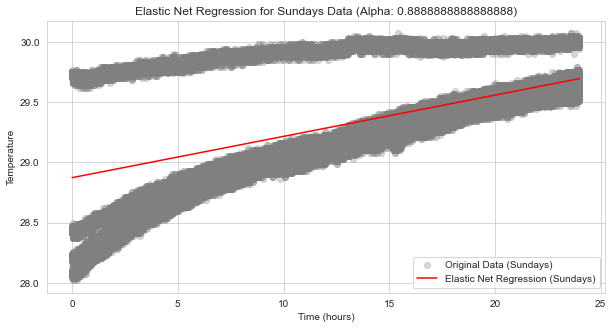

Elastic Net Alpha: 1.0, MSE: 0.26


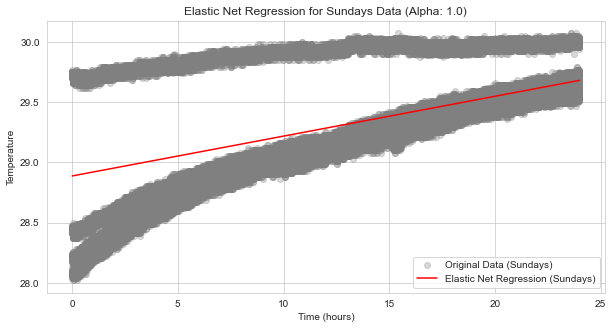

Best Elastic Net Alpha: 0.1111111111111111
Best Elastic Net MSE: 0.15104579029708204
Model parameters for Elastic Net Regression on Sundays data:
Intercept: 28.773895268455284
Coefficient: [0.04260034]
Evaluation metrics for Elastic Net Regression on Sundays data:
MSE: 0.15
MAE: 0.31
R^2: 0.38
RMSE: 0.39


In [25]:
from sklearn.linear_model import ElasticNet

alphas = np.linspace(0, 1, 10)

for alpha in alphas:
    model_elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)  
    model_elastic_net.fit(x_sundays, y_sundays)
    scores = cross_val_score(model_elastic_net, x_sundays, y_sundays, cv=5, scoring='neg_mean_squared_error')
    
    avg_mse = -np.mean(scores)
    
    print(f"Elastic Net Alpha: {alpha}, MSE: {avg_mse:.2f}")
    
    x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
    y_values_sundays = model_elastic_net.predict(x_values_sundays)
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')
    
    plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Elastic Net Regression (Sundays)')
    
    plt.xlabel('Time (hours)')
    plt.ylabel('Temperature')
    plt.legend()
    plt.title(f'Elastic Net Regression for Sundays Data (Alpha: {alpha})')
    
    plt.show()

best_alpha_elastic_net = alphas[np.argmin(scores)]

final_model_elastic_net = ElasticNet(alpha=best_alpha_elastic_net, l1_ratio=0.5)
final_model_elastic_net.fit(x_sundays, y_sundays)
y_pred_sundays_elastic_net = final_model_elastic_net.predict(x_sundays)

mse_sundays_elastic_net = mean_squared_error(y_sundays, y_pred_sundays_elastic_net)
mae_sundays_elastic_net = mean_absolute_error(y_sundays, y_pred_sundays_elastic_net)
r2_sundays_elastic_net = r2_score(y_sundays, y_pred_sundays_elastic_net)
rmse_sundays_elastic_net = sqrt(mse_sundays_elastic_net)

print("Best Elastic Net Alpha:", best_alpha_elastic_net)
print("Best Elastic Net MSE:", mse_sundays_elastic_net)
print("Model parameters for Elastic Net Regression on Sundays data:")
print("Intercept:", final_model_elastic_net.intercept_)
print("Coefficient:", final_model_elastic_net.coef_)
print("Evaluation metrics for Elastic Net Regression on Sundays data:")
print(f"MSE: {mse_sundays_elastic_net:.2f}")
print(f"MAE: {mae_sundays_elastic_net:.2f}")
print(f"R^2: {r2_sundays_elastic_net:.2f}")
print(f"RMSE: {rmse_sundays_elastic_net:.2f}")


Model parameters for Sundays data:
Intercept: 28.51347784013013
Coefficient: [0.04379476]
Model parameters for Monday to Saturday data:
Intercept: 28.21919602439489
Coefficient: [-0.10785634]


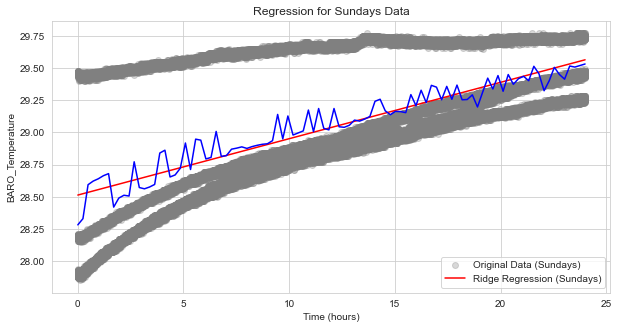

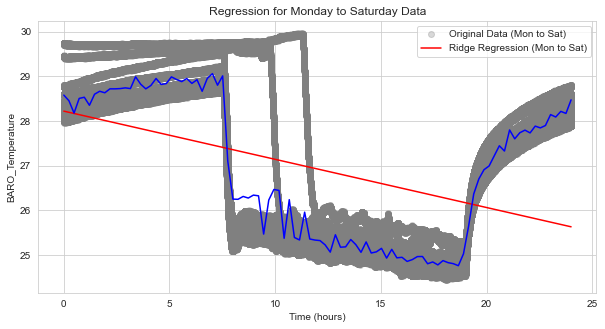

Evaluation metrics for Ridge Regression on Sundays data:
MSE: 0.15
MAE: 0.30
R^2: 0.39
RMSE: 0.38

Evaluation metrics for KNN Regression on Sundays data:
MSE: 0.14
MAE: 0.30
R^2: 0.40
RMSE: 0.38

Evaluation metrics for Ridge Regression on Monday to Saturday data:
MSE: 2.24
MAE: 1.38
R^2: 0.20
RMSE: 1.50

Evaluation metrics for KNN Regression on Monday to Saturday data:
MSE: 0.39
MAE: 0.35
R^2: 0.86
RMSE: 0.62


In [22]:

x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['BARO_Temperature'])

model_sundays = Ridge(alpha=1.0)

model_sundays.fit(x_sundays, y_sundays)

print("Model parameters for Sundays data:")
print("Intercept:", model_sundays.intercept_)
print("Coefficient:", model_sundays.coef_)

y_pred_sundays = model_sundays.predict(x_sundays)

mse_sundays = mean_squared_error(y_sundays, y_pred_sundays)
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays)
r2_sundays = r2_score(y_sundays, y_pred_sundays)
rmse_sundays = sqrt(mse_sundays)



x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays = model_sundays.predict(x_values_sundays)



x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['BARO_Temperature'])

model_mon_to_sat = Ridge(alpha=1.0)

model_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

print("Model parameters for Monday to Saturday data:")
print("Intercept:", model_mon_to_sat.intercept_)
print("Coefficient:", model_mon_to_sat.coef_)

y_pred_mon_to_sat = model_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat)
mae_mon_to_sat = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat)
r2_mon_to_sat = r2_score(y_mon_to_sat, y_pred_mon_to_sat)
rmse_mon_to_sat = sqrt(mse_mon_to_sat)

x_values_mon_to_sat = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat = model_mon_to_sat.predict(x_values_mon_to_sat)




knn_sundays = KNeighborsRegressor(n_neighbors=5)  
knn_sundays.fit(x_sundays, y_sundays)

y_pred_sundays_knn = knn_sundays.predict(x_sundays)

mse_sundays_knn = mean_squared_error(y_sundays, y_pred_sundays_knn)
mae_sundays_knn = mean_absolute_error(y_sundays, y_pred_sundays_knn)
r2_sundays_knn = r2_score(y_sundays, y_pred_sundays_knn)
rmse_sundays_knn = sqrt(mse_sundays_knn)



knn_mon_to_sat = KNeighborsRegressor(n_neighbors=5)  
knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

y_pred_mon_to_sat_knn = knn_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat_knn = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat_knn)
mae_mon_to_sat_knn = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat_knn)
r2_mon_to_sat_knn = r2_score(y_mon_to_sat, y_pred_mon_to_sat_knn)
rmse_mon_to_sat_knn = sqrt(mse_mon_to_sat_knn)


x_values_sundays_knn = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays_knn = knn_sundays.predict(x_values_sundays_knn)


x_values_mon_to_sat_knn = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat_knn = knn_mon_to_sat.predict(x_values_mon_to_sat_knn)




x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['BARO_Temperature'])
x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['BARO_Temperature'])

knn_sundays = KNeighborsRegressor(n_neighbors=5)
knn_sundays.fit(x_sundays, y_sundays)
# 2-15 

plt.figure(figsize=(10, 5))

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')

plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression (Sundays)')

plt.xlabel('Time (hours)')
plt.ylabel('BARO_Temperature')
plt.legend()
plt.title('Regression for Sundays Data')

plt.plot(x_values_sundays_knn, y_values_sundays_knn, color='blue', label=f'KNN Regression (Sundays)')

plt.show()


knn_mon_to_sat = KNeighborsRegressor(n_neighbors=5)
knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)


plt.figure(figsize=(10, 5))

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data (Mon to Sat)')

plt.plot(x_values_mon_to_sat, y_values_mon_to_sat, color='red', label=f'Ridge Regression (Mon to Sat)')

plt.xlabel('Time (hours)')
plt.ylabel('BARO_Temperature')
plt.legend()
plt.title('Regression for Monday to Saturday Data')


plt.plot(x_values_mon_to_sat_knn, y_values_mon_to_sat_knn, color='blue', label=f'KNN Regression (Mon to Sat)')

plt.show()

print("Evaluation metrics for Ridge Regression on Sundays data:")
print(f"MSE: {mse_sundays:.2f}")
print(f"MAE: {mae_sundays:.2f}")
print(f"R^2: {r2_sundays:.2f}")
print(f"RMSE: {rmse_sundays:.2f}")

print("\nEvaluation metrics for KNN Regression on Sundays data:")
print(f"MSE: {mse_sundays_knn:.2f}")
print(f"MAE: {mae_sundays_knn:.2f}")
print(f"R^2: {r2_sundays_knn:.2f}")
print(f"RMSE: {rmse_sundays_knn:.2f}")

print("\nEvaluation metrics for Ridge Regression on Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat:.2f}")
print(f"MAE: {mae_mon_to_sat:.2f}")
print(f"R^2: {r2_mon_to_sat:.2f}")
print(f"RMSE: {rmse_mon_to_sat:.2f}")

print("\nEvaluation metrics for KNN Regression on Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat_knn:.2f}")
print(f"MAE: {mae_mon_to_sat_knn:.2f}")
print(f"R^2: {r2_mon_to_sat_knn:.2f}")
print(f"RMSE: {rmse_mon_to_sat_knn:.2f}")



Model parameters for Sundays data:
Intercept: 73.0397138086148
Coefficient: [0.11644293]
Model parameters for Monday to Saturday data:
Intercept: 72.02167641797965
Coefficient: [0.02498987]


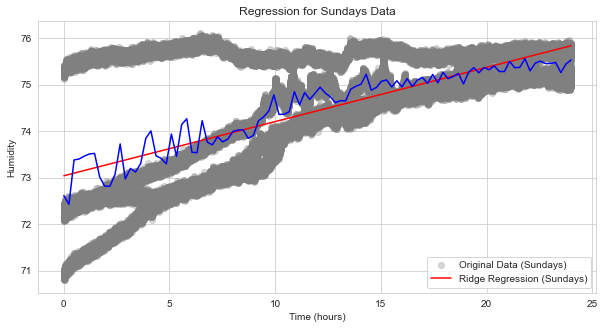

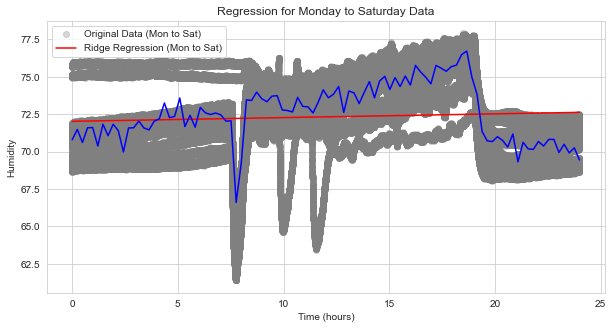

Evaluation metrics for Ridge Regression on Sundays data:
MSE: 0.85
MAE: 0.67
R^2: 0.43
RMSE: 0.92

Evaluation metrics for KNN Regression on Sundays data:
MSE: 0.82
MAE: 0.65
R^2: 0.45
RMSE: 0.91

Evaluation metrics for Ridge Regression on Monday to Saturday data:
MSE: 5.77
MAE: 1.94
R^2: 0.01
RMSE: 2.40

Evaluation metrics for KNN Regression on Monday to Saturday data:
MSE: 3.09
MAE: 1.33
R^2: 0.47
RMSE: 1.76


In [23]:

x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['Humidity'])

model_sundays = Ridge(alpha=1.0)

model_sundays.fit(x_sundays, y_sundays)

print("Model parameters for Sundays data:")
print("Intercept:", model_sundays.intercept_)
print("Coefficient:", model_sundays.coef_)

y_pred_sundays = model_sundays.predict(x_sundays)

mse_sundays = mean_squared_error(y_sundays, y_pred_sundays)
mae_sundays = mean_absolute_error(y_sundays, y_pred_sundays)
r2_sundays = r2_score(y_sundays, y_pred_sundays)
rmse_sundays = sqrt(mse_sundays)



x_values_sundays = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays = model_sundays.predict(x_values_sundays)



x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['Humidity'])

model_mon_to_sat = Ridge(alpha=1.0)

model_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

print("Model parameters for Monday to Saturday data:")
print("Intercept:", model_mon_to_sat.intercept_)
print("Coefficient:", model_mon_to_sat.coef_)

y_pred_mon_to_sat = model_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat)
mae_mon_to_sat = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat)
r2_mon_to_sat = r2_score(y_mon_to_sat, y_pred_mon_to_sat)
rmse_mon_to_sat = sqrt(mse_mon_to_sat)

x_values_mon_to_sat = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat = model_mon_to_sat.predict(x_values_mon_to_sat)




knn_sundays = KNeighborsRegressor(n_neighbors=5)  
knn_sundays.fit(x_sundays, y_sundays)

y_pred_sundays_knn = knn_sundays.predict(x_sundays)

mse_sundays_knn = mean_squared_error(y_sundays, y_pred_sundays_knn)
mae_sundays_knn = mean_absolute_error(y_sundays, y_pred_sundays_knn)
r2_sundays_knn = r2_score(y_sundays, y_pred_sundays_knn)
rmse_sundays_knn = sqrt(mse_sundays_knn)



knn_mon_to_sat = KNeighborsRegressor(n_neighbors=5)  
knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)

y_pred_mon_to_sat_knn = knn_mon_to_sat.predict(x_mon_to_sat)

mse_mon_to_sat_knn = mean_squared_error(y_mon_to_sat, y_pred_mon_to_sat_knn)
mae_mon_to_sat_knn = mean_absolute_error(y_mon_to_sat, y_pred_mon_to_sat_knn)
r2_mon_to_sat_knn = r2_score(y_mon_to_sat, y_pred_mon_to_sat_knn)
rmse_mon_to_sat_knn = sqrt(mse_mon_to_sat_knn)


x_values_sundays_knn = np.linspace(min(x_sundays), max(x_sundays), 100).reshape(-1, 1)
y_values_sundays_knn = knn_sundays.predict(x_values_sundays_knn)


x_values_mon_to_sat_knn = np.linspace(min(x_mon_to_sat), max(x_mon_to_sat), 100).reshape(-1, 1)
y_values_mon_to_sat_knn = knn_mon_to_sat.predict(x_values_mon_to_sat_knn)




x_sundays = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_sundays = np.array(sundays_data['Humidity'])
x_mon_to_sat = np.array(mon_to_sat_data['datetime'].dt.hour + mon_to_sat_data['datetime'].dt.minute / 60 + mon_to_sat_data['datetime'].dt.second / 3600).reshape(-1, 1)
y_mon_to_sat = np.array(mon_to_sat_data['Humidity'])

knn_sundays = KNeighborsRegressor(n_neighbors=5)
knn_sundays.fit(x_sundays, y_sundays)


plt.figure(figsize=(10, 5))

plt.scatter(x_sundays, y_sundays, color='gray', alpha=0.3, label='Original Data (Sundays)')

plt.plot(x_values_sundays, y_values_sundays, color='red', label=f'Ridge Regression (Sundays)')

plt.xlabel('Time (hours)')
plt.ylabel('Humidity')
plt.legend()
plt.title('Regression for Sundays Data')

plt.plot(x_values_sundays_knn, y_values_sundays_knn, color='blue', label=f'KNN Regression (Sundays)')

plt.show()


knn_mon_to_sat = KNeighborsRegressor(n_neighbors=5)
knn_mon_to_sat.fit(x_mon_to_sat, y_mon_to_sat)


plt.figure(figsize=(10, 5))

plt.scatter(x_mon_to_sat, y_mon_to_sat, color='gray', alpha=0.3, label='Original Data (Mon to Sat)')

plt.plot(x_values_mon_to_sat, y_values_mon_to_sat, color='red', label=f'Ridge Regression (Mon to Sat)')

plt.xlabel('Time (hours)')
plt.ylabel('Humidity')
plt.legend()
plt.title('Regression for Monday to Saturday Data')


plt.plot(x_values_mon_to_sat_knn, y_values_mon_to_sat_knn, color='blue', label=f'KNN Regression (Mon to Sat)')

plt.show()

print("Evaluation metrics for Ridge Regression on Sundays data:")
print(f"MSE: {mse_sundays:.2f}")
print(f"MAE: {mae_sundays:.2f}")
print(f"R^2: {r2_sundays:.2f}")
print(f"RMSE: {rmse_sundays:.2f}")

print("\nEvaluation metrics for KNN Regression on Sundays data:")
print(f"MSE: {mse_sundays_knn:.2f}")
print(f"MAE: {mae_sundays_knn:.2f}")
print(f"R^2: {r2_sundays_knn:.2f}")
print(f"RMSE: {rmse_sundays_knn:.2f}")

print("\nEvaluation metrics for Ridge Regression on Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat:.2f}")
print(f"MAE: {mae_mon_to_sat:.2f}")
print(f"R^2: {r2_mon_to_sat:.2f}")
print(f"RMSE: {rmse_mon_to_sat:.2f}")

print("\nEvaluation metrics for KNN Regression on Monday to Saturday data:")
print(f"MSE: {mse_mon_to_sat_knn:.2f}")
print(f"MAE: {mae_mon_to_sat_knn:.2f}")
print(f"R^2: {r2_mon_to_sat_knn:.2f}")
print(f"RMSE: {rmse_mon_to_sat_knn:.2f}")

